In [11]:
library(ggplot2)
titanic = read.csv("titanic.csv")
titanic$Pclass = factor(titanic$Pclass)
titanic$Survived = factor(titanic$Survived)
titanic$PassengerId = NULL
titanic$Name = NULL
titanic$Ticket = NULL
titanic$Cabin = NULL
testframe = data.frame("Var1" = c(1,2,3,NA,4,1,1), "Var2" = c(1,NA,NA,3,2,2,4),
          "Var3" = c(1:7), "CVar1" = c("Oi", "Olly", "Oi", NA, "Oi", "Why", NA), 
          "CVar2" = c("A", "B", "C", "D", "A", "B", "C"))


In [12]:
###1.	Write a function that inputs a dataset (data frame) and outputs the number of missing values in each variable
sumMiss = function(x){
  string = c()
  for(i in 1:length(x)){
    y = sum(is.na(x[,i]))
    string = c(string, y)
  }
  return(string)
}
sumMiss(testframe)

[1] 1 2 0 2 0

In [13]:
###Write a function that inputs a dataset and outputs the names of variables with missing values
nameMiss = function(x){
  string = c()
  for(i in 1:length(x)){
    if(sum(is.na(x[,i])) > 0){
      y = colnames(x[i])
      string = c(string, y)
    }
    
  }
  return(string)
}
nameMiss(testframe)

[1] "Var1"  "Var2"  "CVar1"

In [14]:
###3.	Write a function that inputs a dataset and outputs (1) the names of variables with missing values and (2) the corresponding number of missing values in each variables


nameSumMiss = function(x){
  #matrix1 = matrix(ncol = 2)
  string1 = c()
  string2 = c()
  for(i in 1:ncol(x)){
    if(sum(is.na(x[,i])) > 0){
      y = colnames(x[i])
      z = sum(is.na(x[,i]))
      #matrix1 = c(matrix1, y,z)
      string1 = c(string1, y)
      string2 = c(string2, z)
    }
    
  }
  return(matrix(c(string1,string2), ncol = 2))
  #return(matrix1)
}
nameSumMiss(testframe)

Var1,1
Var2,2
CVar1,2


In [15]:
###4.	Write a function that inputs a dataset and output a dataset with missing values handled as follows:
######	Missing values of numeric variables are replaced by the means of the non-missing values in the variables 
######	Missing values of categorical variables are replaced by the most frequent category in the variables
CorrectNA = function(x){
  
  for(i in 1:ncol(x)){
    
    if(is.numeric(x[,i])){
      x[,i][is.na(x[,i])] = mean(x[,i], na.rm=TRUE)
 
    }else if(is.factor(x[,i])){
      uniqx = unique(x[,i])
      x[,i][is.na(x[,i])] = uniqx[which.max(tabulate(match(x[,i], uniqx)))]
    }
        
  }
  return(x)
}
CorrectNA(testframe)

Var1,Var2,Var3,CVar1,CVar2
1,1.0,1,Oi,A
2,2.4,2,Olly,B
3,2.4,3,Oi,C
2,3.0,4,Oi,D
4,2.0,5,Oi,A
1,2.0,6,Why,B
1,4.0,7,Oi,C


In [16]:
###5.	Write a function that inputs a dataset and output (1) sub-dataset containing categorical variables and (2) sub-dataset containing numeric variables
SplitData = function(x){
  
  Num = NULL
  Cat = NULL
  NumCol = 0
  CatCol = 0
  
  for(i in 1:ncol(x)){
    
    if(is.numeric(x[,i])){
      if(is.null(Num)) {
        NumCol = NumCol + 1
        Num = matrix(x[,i], ncol = NumCol)
      } else {
        NumCol = NumCol+1
        Num = matrix(c(Num, x[,i]), ncol = NumCol)
      }
    }else if(is.factor(x[,i])){
      if(is.null(Cat)) {
        CatCol = CatCol+1
        Cat = matrix(x[,i], ncol = CatCol)
      } else {
          CatCol = CatCol+1
          Cat = matrix(c(Cat, x[,i]), ncol = CatCol)
      }  
     
    }
  }
  return(list(Num,Cat))
}
SplitData(testframe)

[[1]]
     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    2   NA    2
[3,]    3   NA    3
[4,]   NA    3    4
[5,]    4    2    5
[6,]    1    2    6
[7,]    1    4    7

[[2]]
     [,1]   [,2]
[1,] "Oi"   "1" 
[2,] "Olly" "2" 
[3,] "Oi"   "3" 
[4,] NA     "4" 
[5,] "Oi"   "1" 
[6,] "Why"  "2" 
[7,] NA     "3"

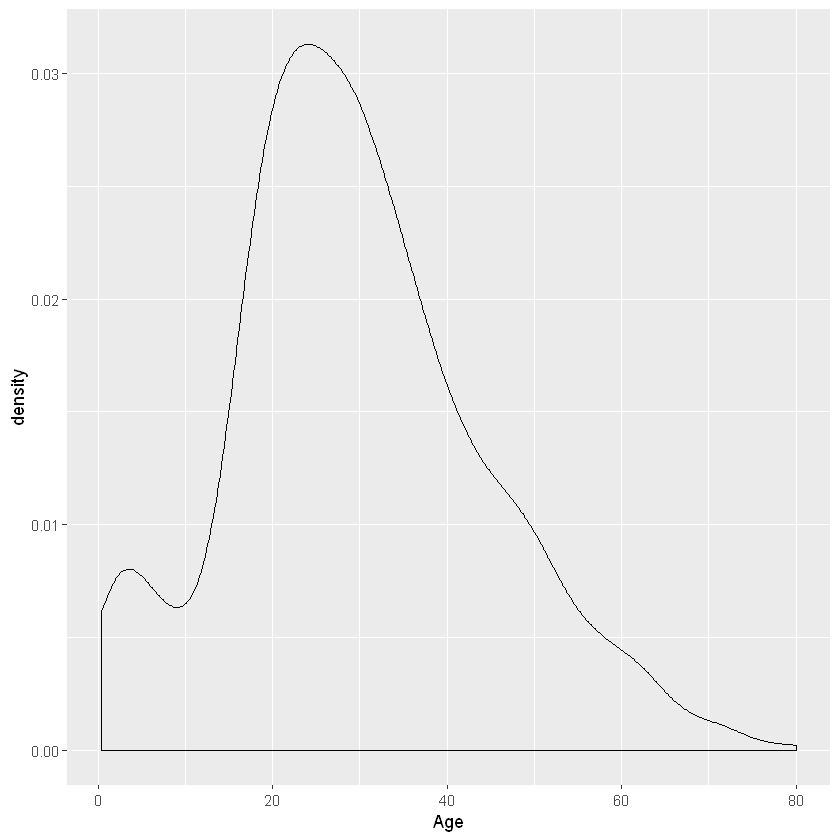

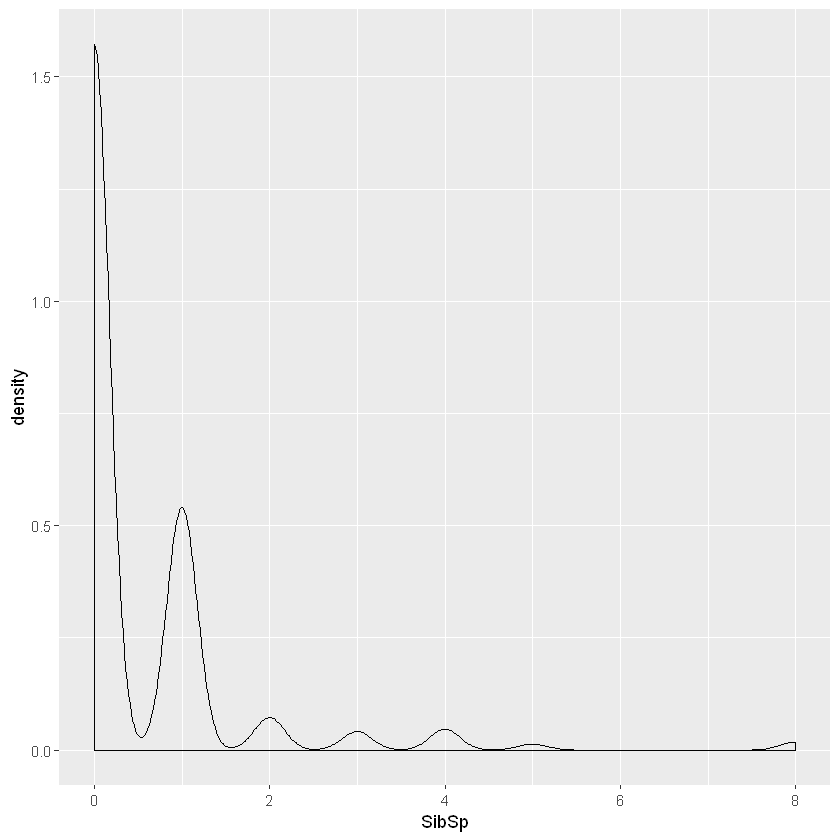

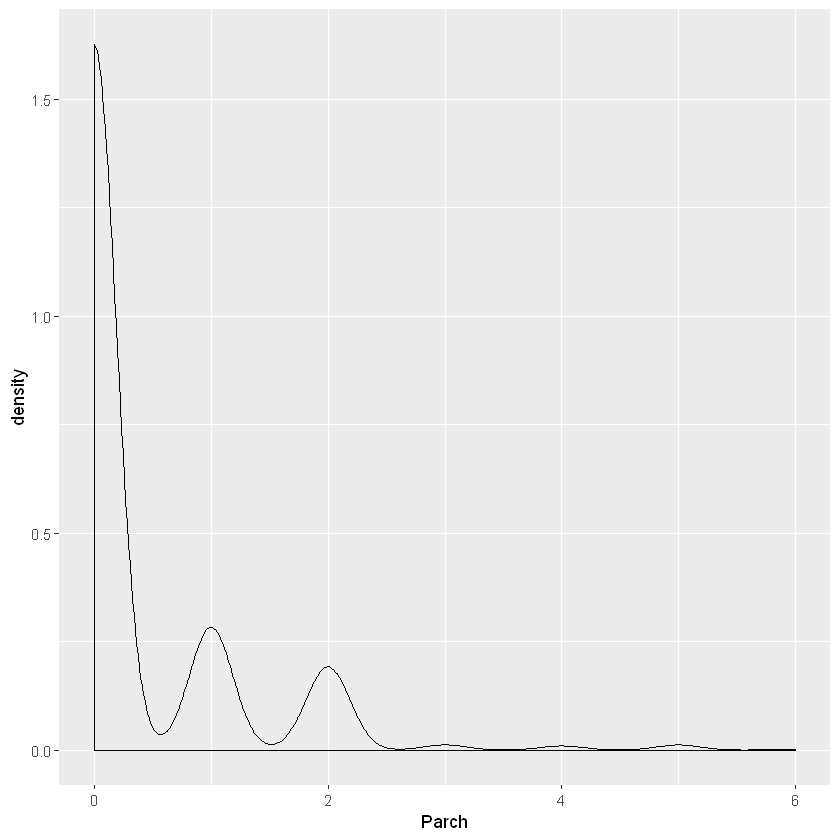

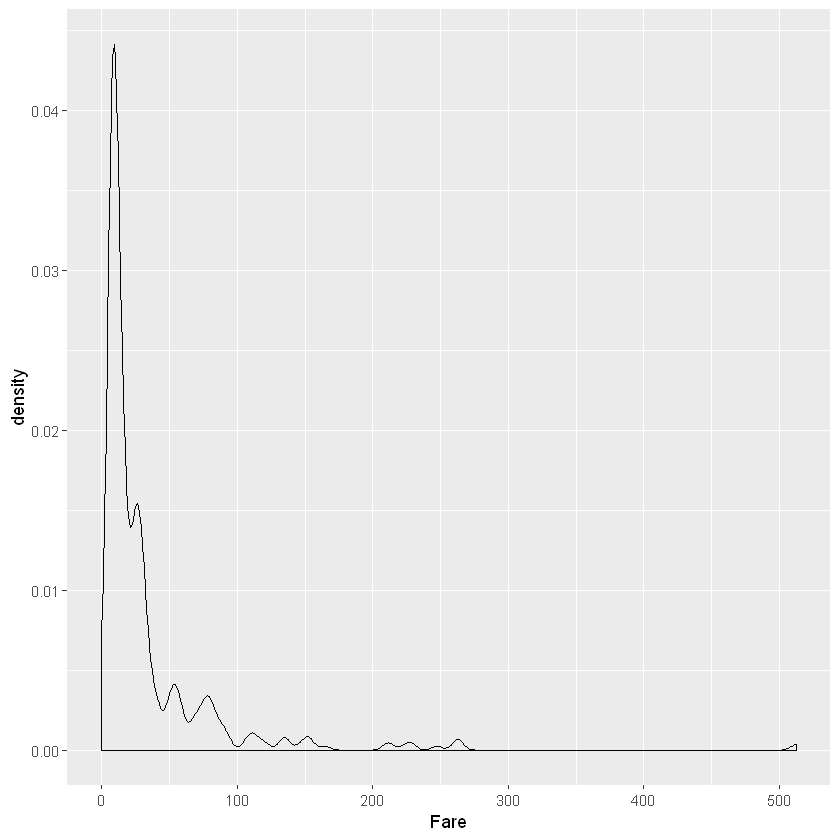

In [17]:
###6.	Write a function that inputs a dataset and output density curves of all numeric variables
Density = function(x){
for(i in 1:ncol(x)){
    
    if(is.numeric(x[,i])){
      print(ggplot() + geom_density(x, mapping = aes(x = x[,i]), na.rm = TRUE) 
            + labs(x = names(x)[i]))
    }
  
}
}
Density(titanic)

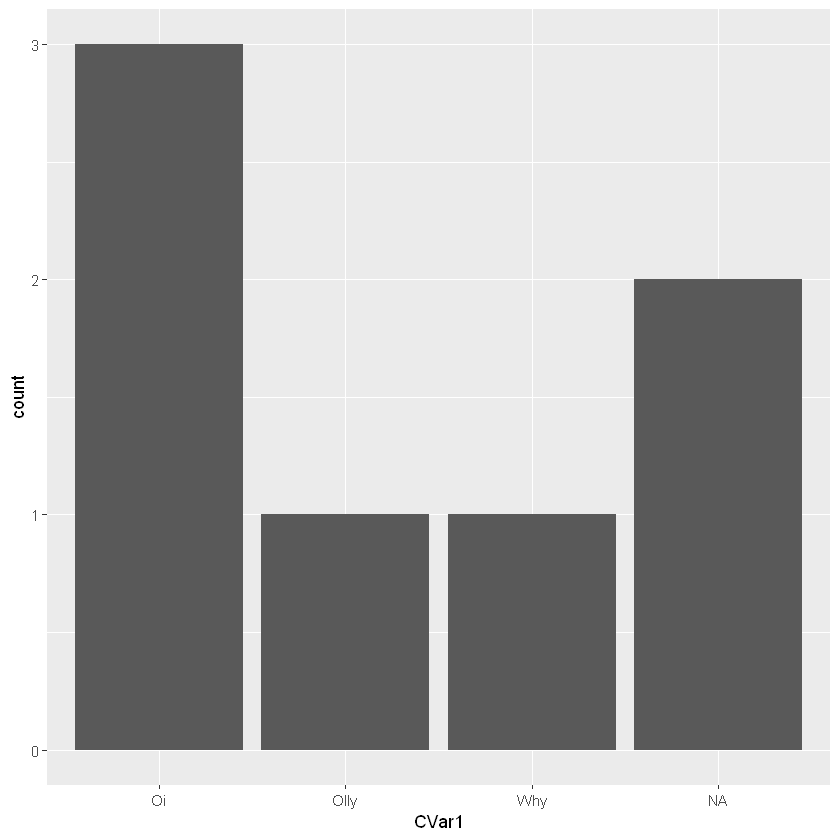

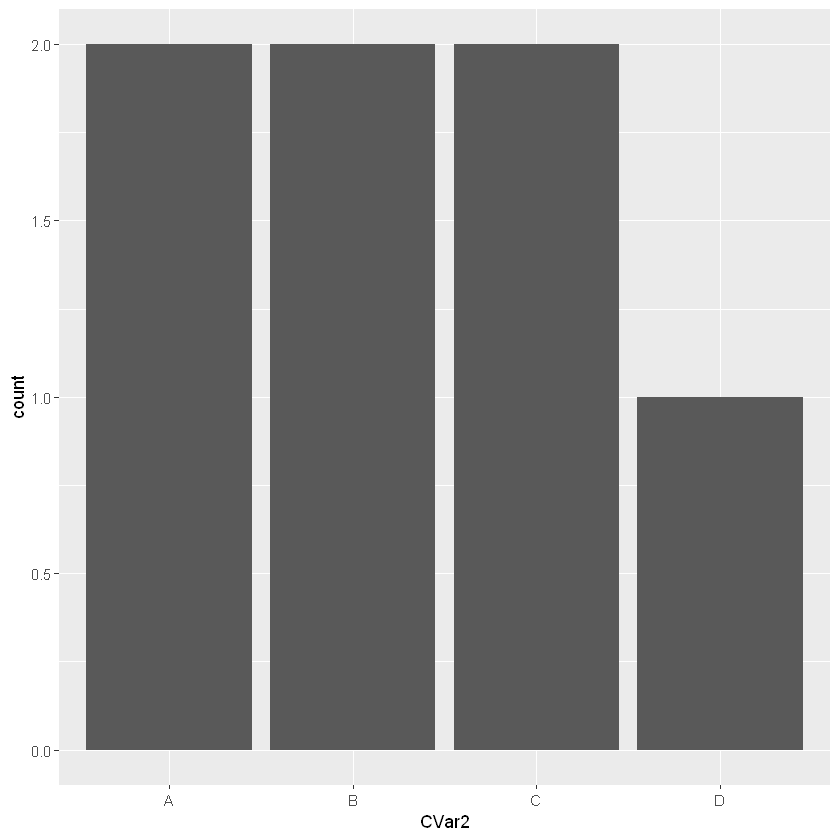

In [18]:
###7.	Write a function that inputs a dataset and output bar charts of all categorical variables
Bars = function(x){
  
for(i in 1:ncol(x)){
    
    if(is.factor(x[,i])){
      print(ggplot() + geom_bar(x, mapping = aes(x = x[,i])) + labs(x = names(x)[i]))
    }
  
}
}
Bars(testframe)

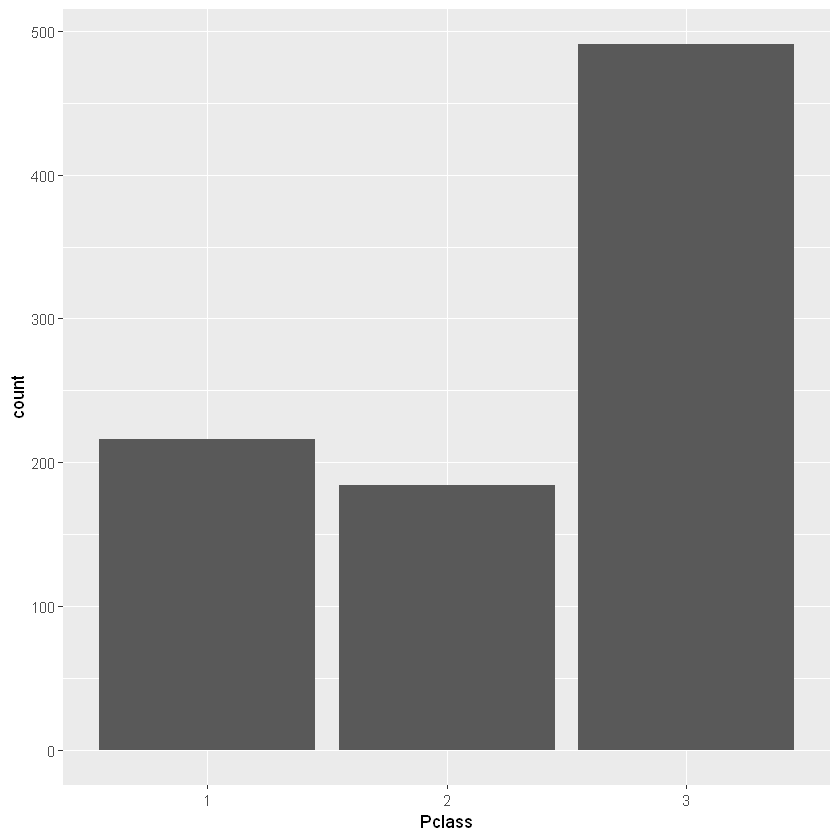

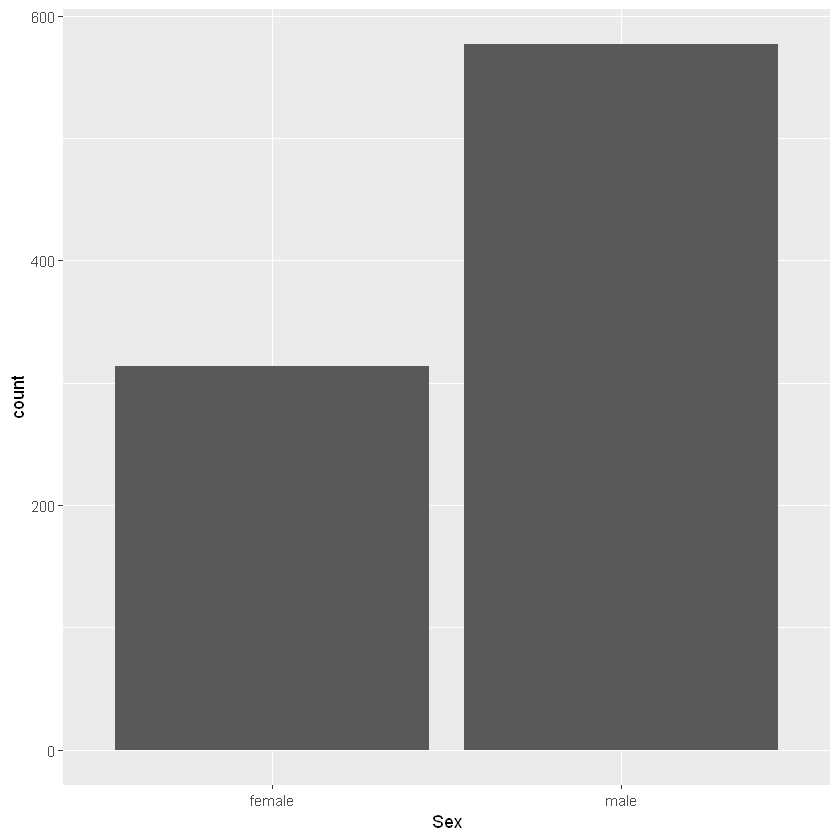

In [20]:
###8.	Write a function that inputs a dataset and two number i, j and outputs bar charts of column i and column j.  If either i or j are not categorical variables, output a message saying so
SelectedBar= function(x,i,j){
  if(is.factor(x[,i]) & is.factor(x[,j])){
    print(ggplot() + geom_bar(x, mapping = aes(x = x[,i]))+ labs(x = names(x)[i]))
    print(ggplot() + geom_bar(x, mapping = aes(x = x[,j]))+ labs(x = names(x)[j]))
  } else {print("Either i or j is not categorical")}
  
}
SelectedBar(titanic,2,3)

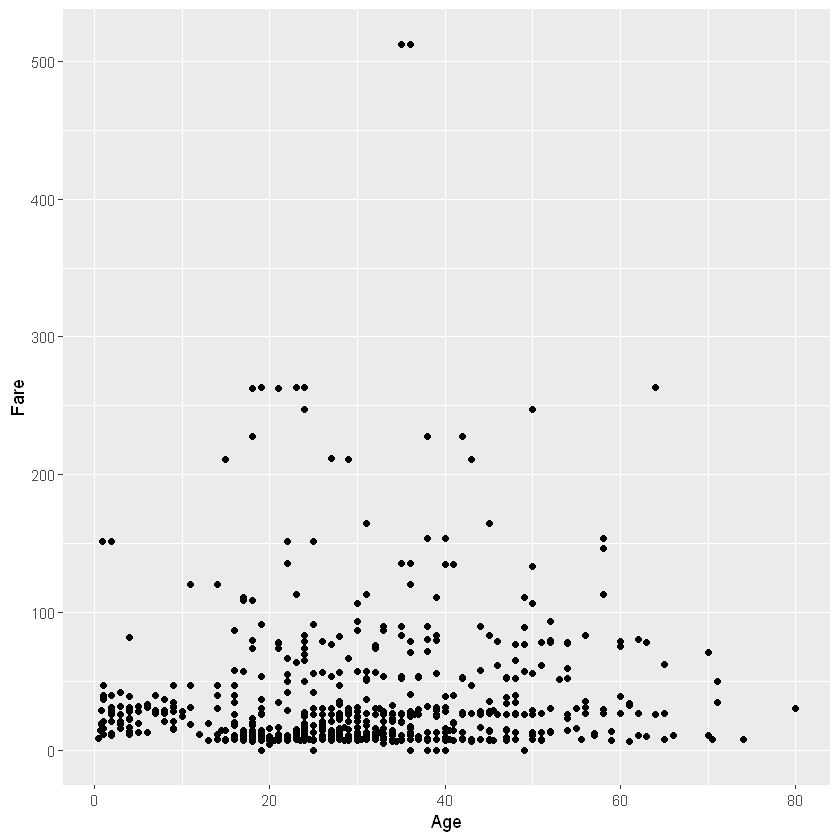

In [21]:
###9.	Write a function that inputs a dataset and two number i, j and outputs the scatter plot of column i and column j. If either i or j are not numeric variables, output a message saying so
SelectedScatter= function(x,i,j){
  if(is.numeric(x[,i]) & is.numeric(x[,j])){
    print(ggplot() + geom_point(x, mapping = aes(x = x[,i], y = x[,j]), na.rm = TRUE) +
            labs(x = names(x)[i], y = names(x)[j]))
  } else {print("Either i or j is not numeric")}
  
}
SelectedScatter(titanic,4,7)

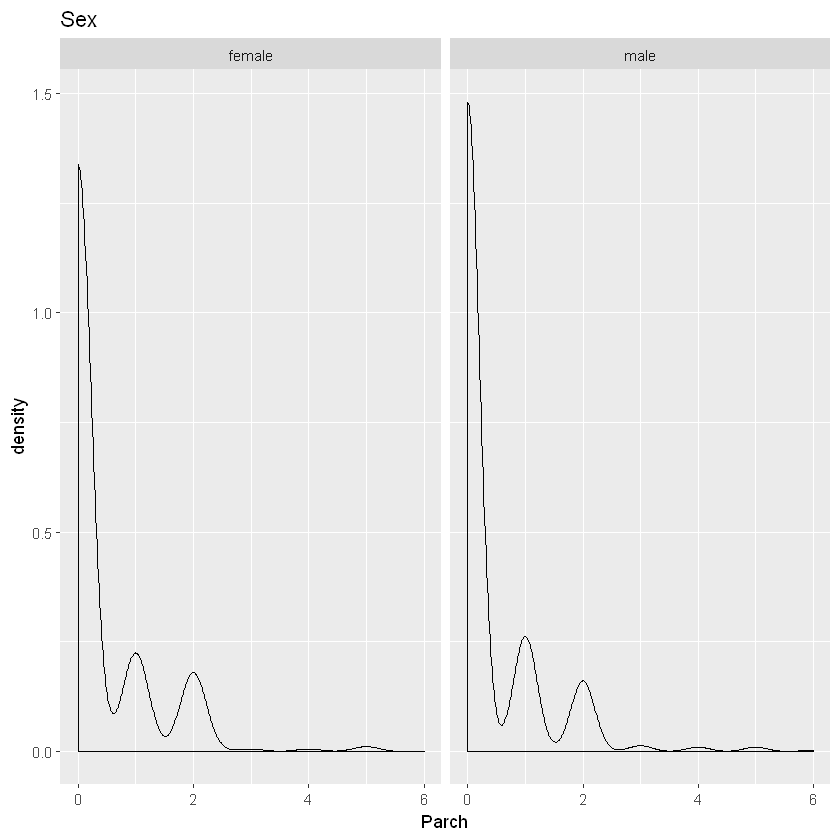

In [22]:
###10.	Write a function that inputs a dataset and two number i, j and output the density curves of column i partitioning on categories of column j. If the two columns are not suitable for the graph, print out the message saying so. 
SeparatedDensities= function(x,i,j){
  if(is.factor(x[,i]) & is.numeric(x[,j])){
    print(ggplot() + geom_density(x, mapping = aes(x = x[,j]), na.rm = TRUE) +
            facet_wrap(x[,i]) + labs(x = names(x)[j], title = names(x)[i]))
  } else {print("At least one of the columns is of incorrect type")}
  
}
SeparatedDensities(titanic,3,6)

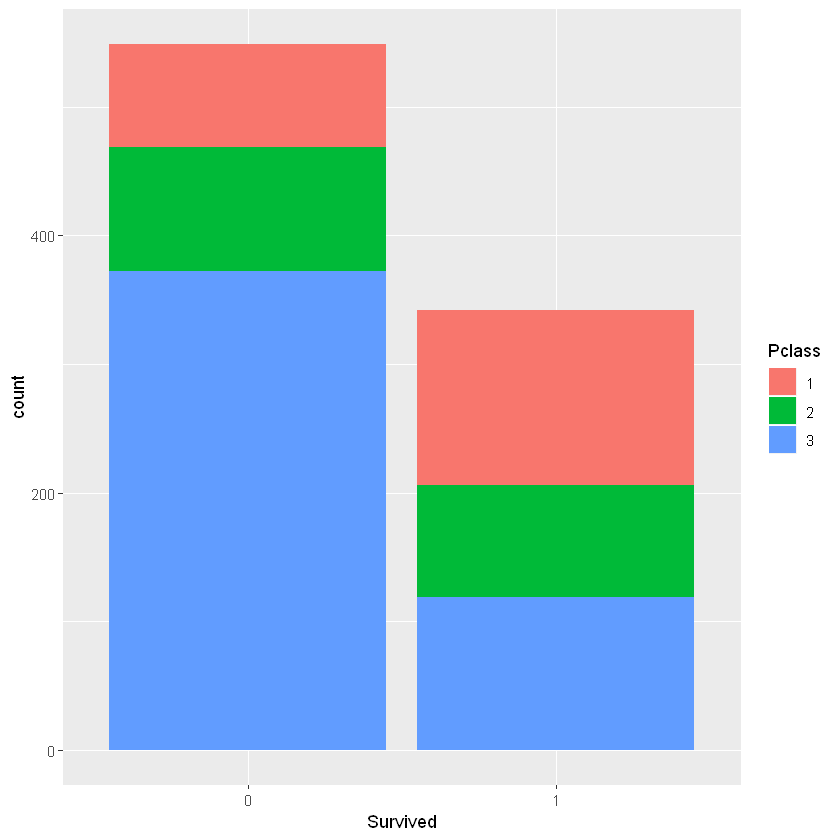

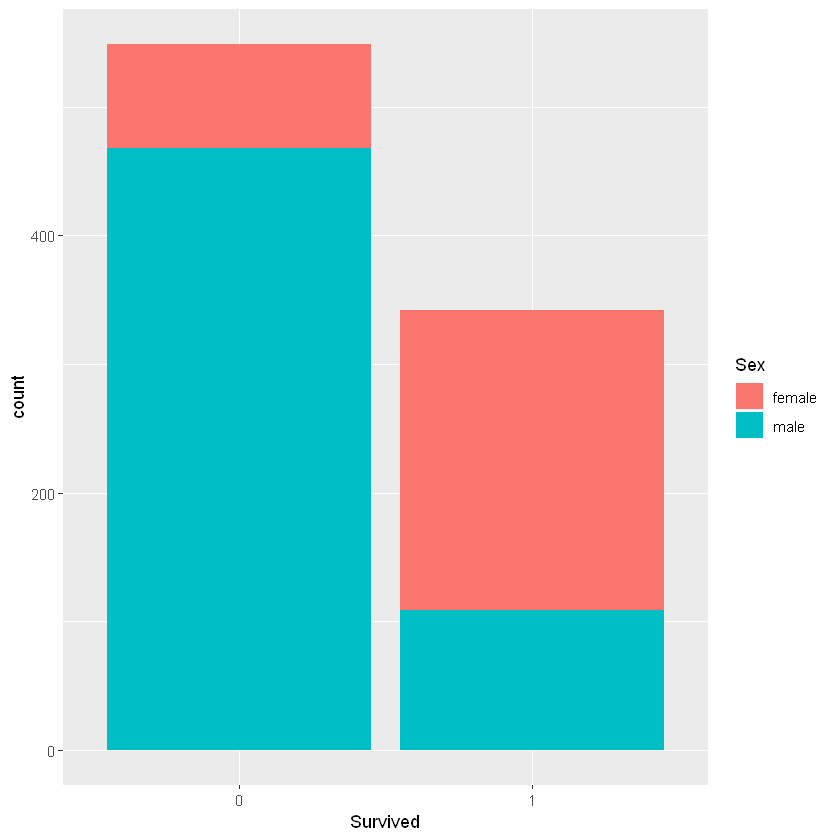

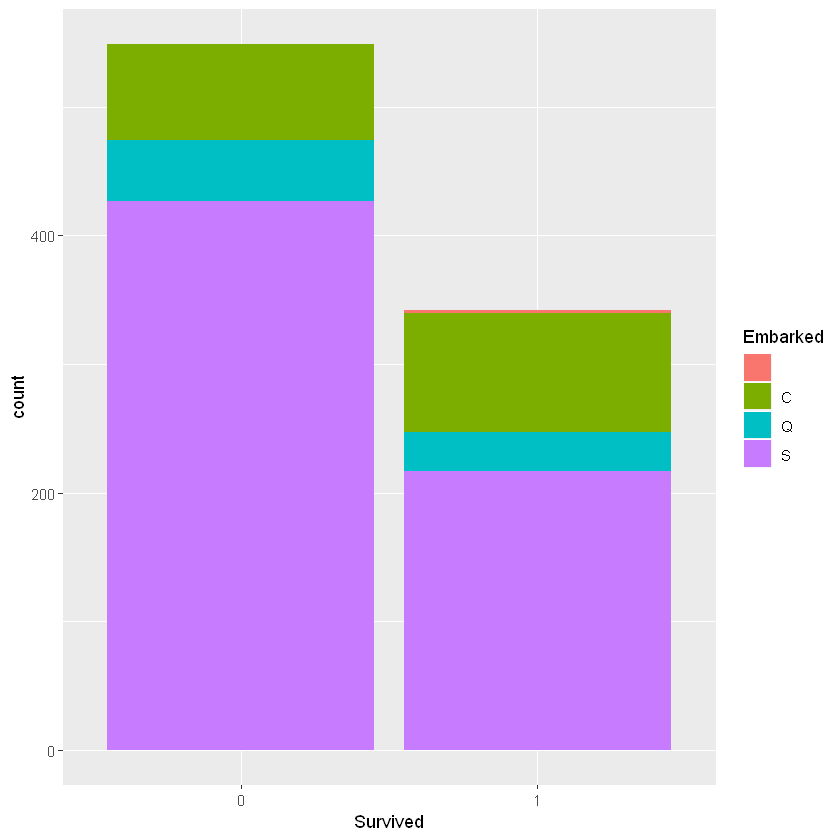

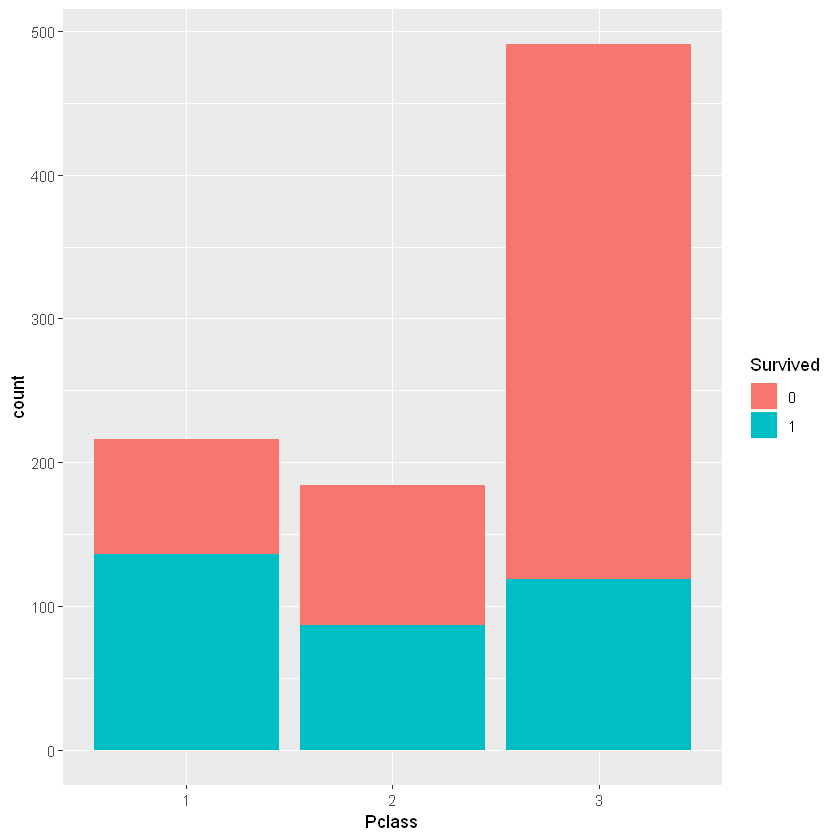

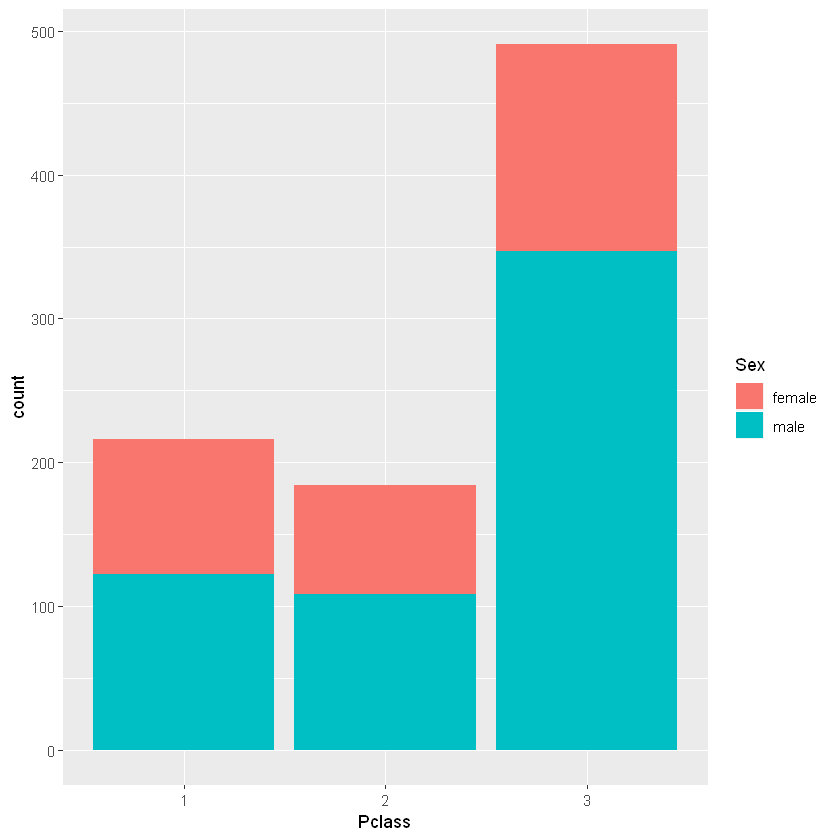

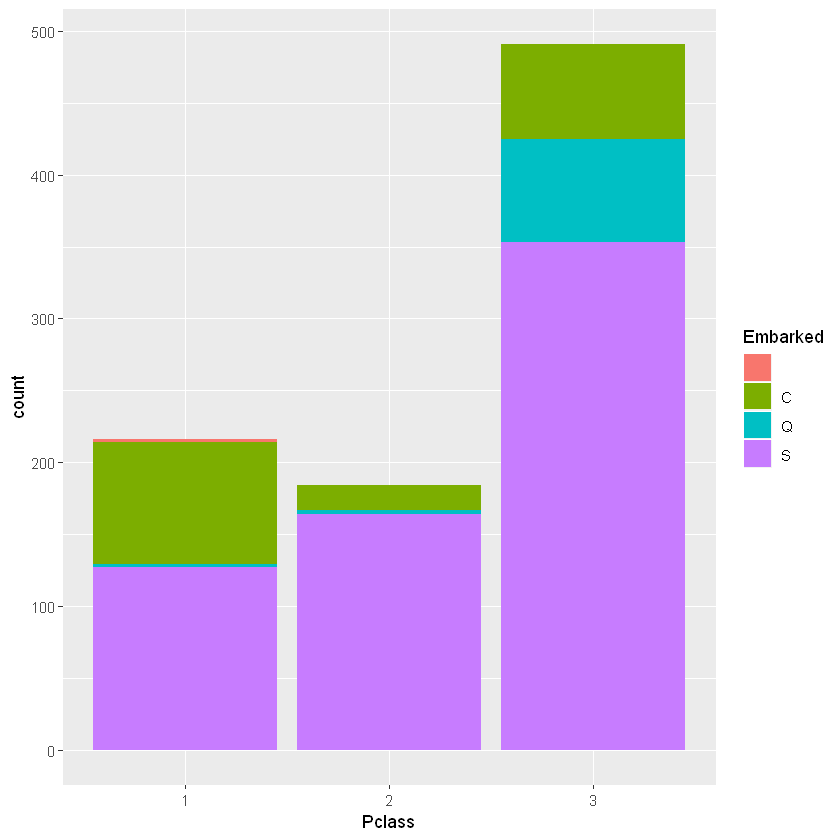

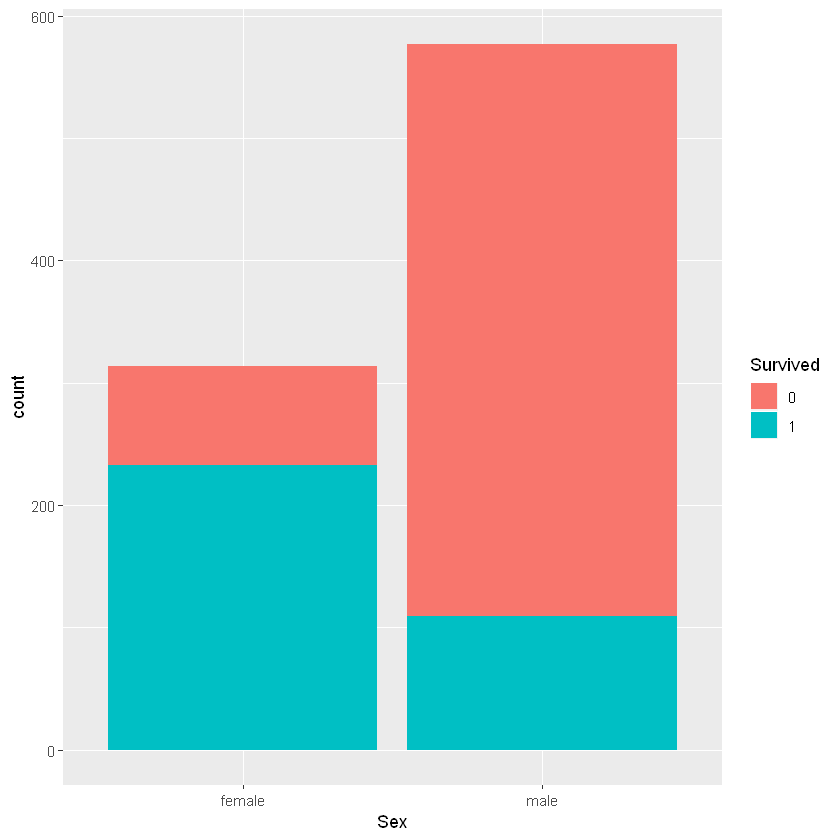

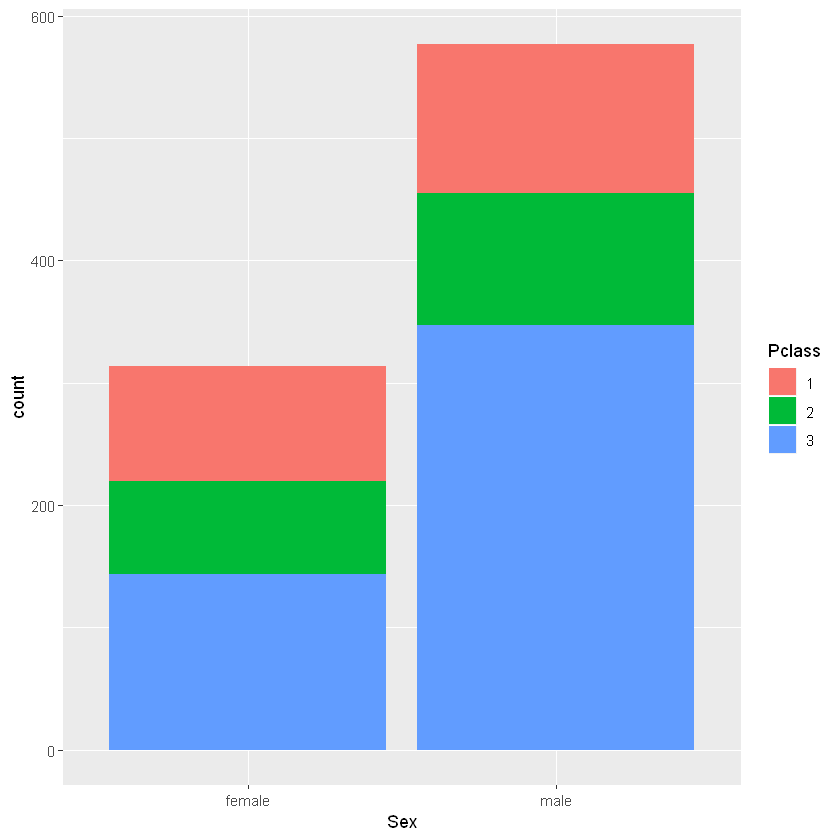

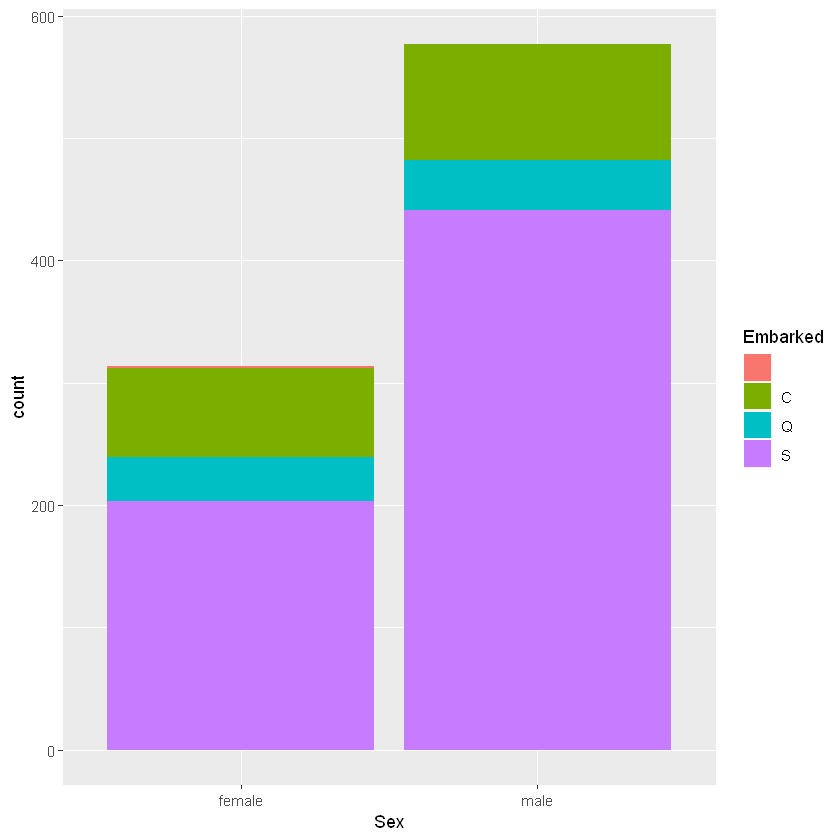

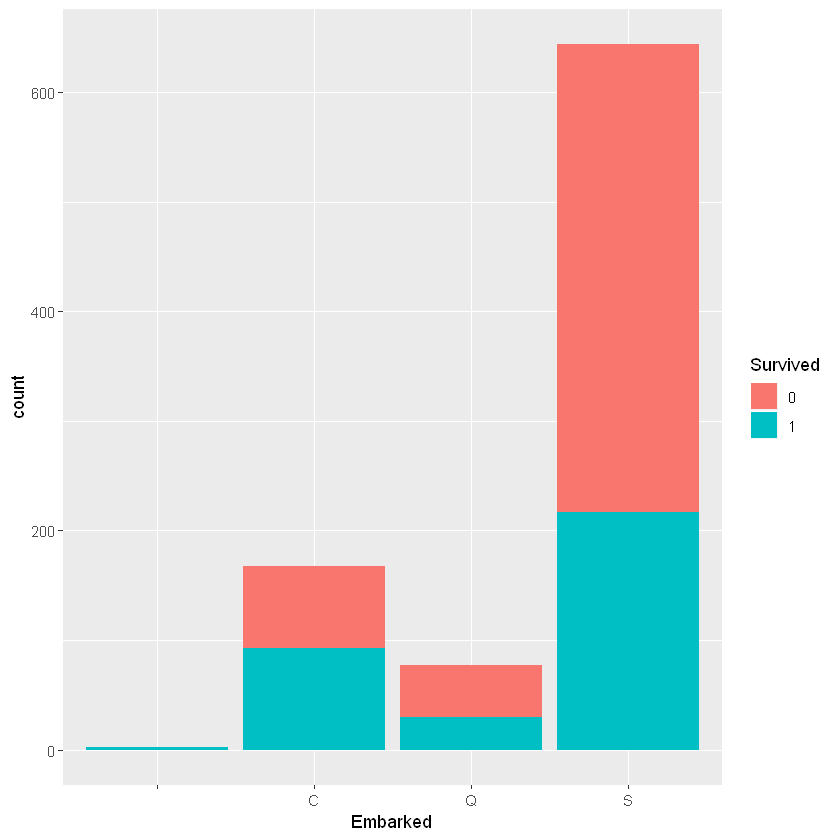

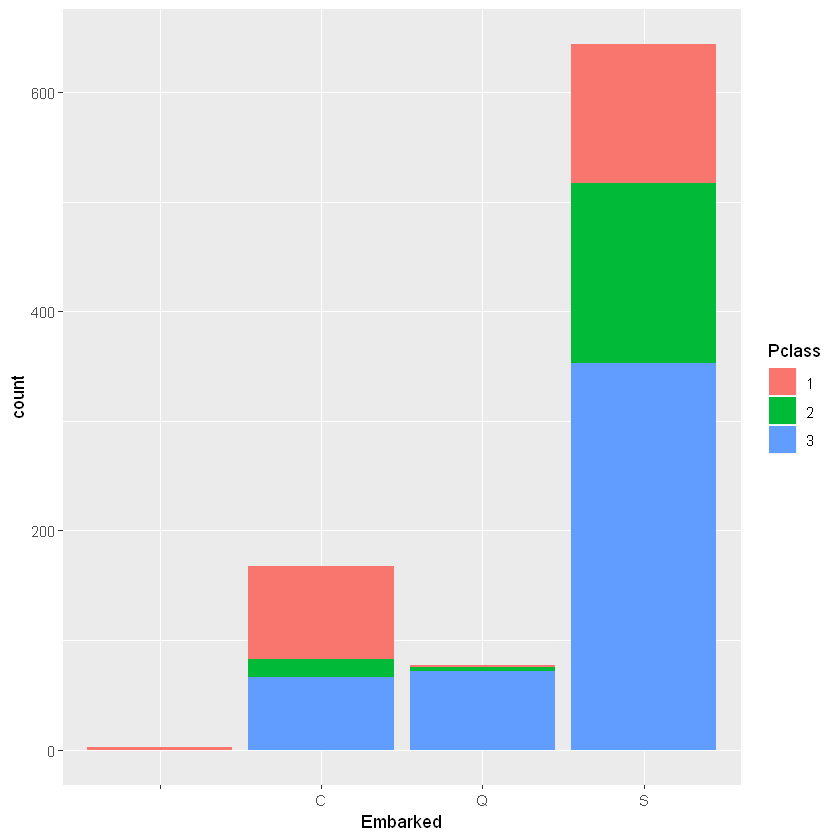

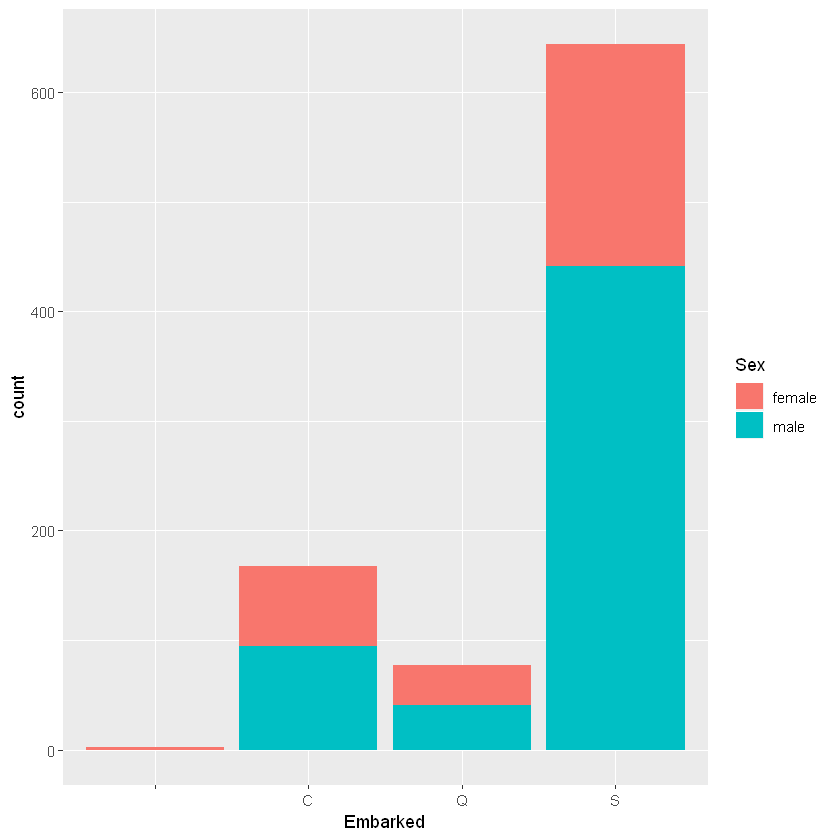

In [23]:
###11.	Write a function that inputs a dataset and output all possible bar charts of pairs of variables in the dataset. 
AllBars = function(x){
  
for(i in 1:ncol(x)){
    for(j in 1:ncol(x)){
      if(is.factor(x[,j]) & is.factor(x[,i]) & i != j){  
        print(ggplot() + geom_bar(x, mapping = aes(x = x[,i], fill = x[,j]), na.rm = TRUE) + 
                labs(x = names(x)[i], fill = names(x)[j]))
      }
    }
  }
#if statements added to shrink number of results and target actually interesting ones  
}
AllBars(titanic)

###12.	Write a function that inputs a dataset and output all possible density curves of variables in the dataset. 
AllDensities = function(x){
  
for(i in 1:ncol(x)){
  if(is.numeric(x[,i])){
        print(ggplot() + geom_density(x, mapping = aes(x = x[,i]), na.rm = TRUE) + 
                labs(x = names(x)[i]))
  }
#if statements added to shrink number of results and target actually interesting ones  
}
}

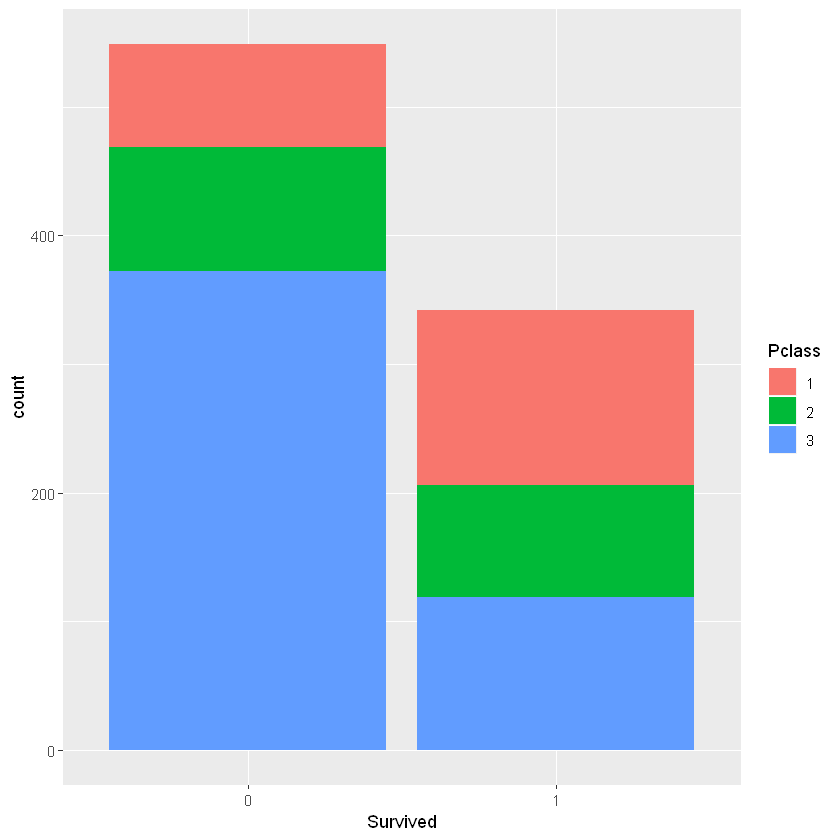

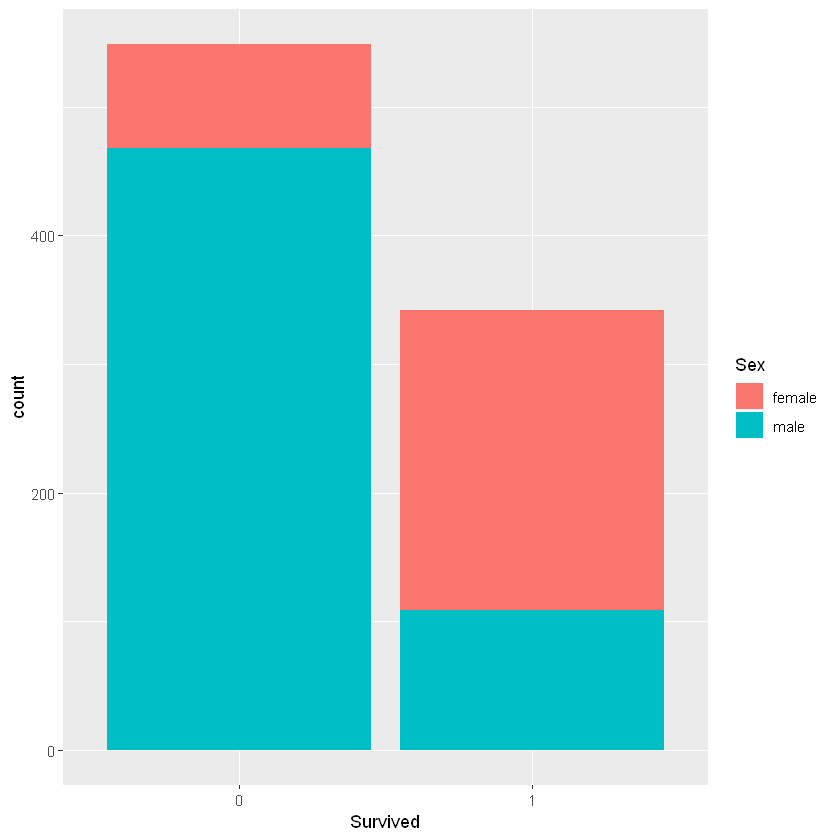

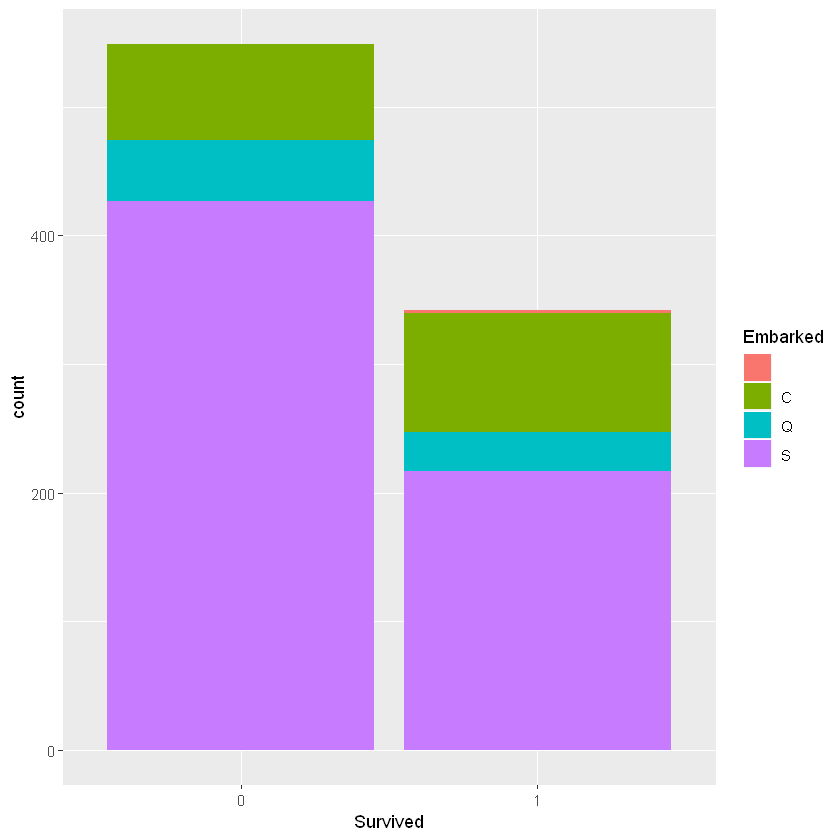

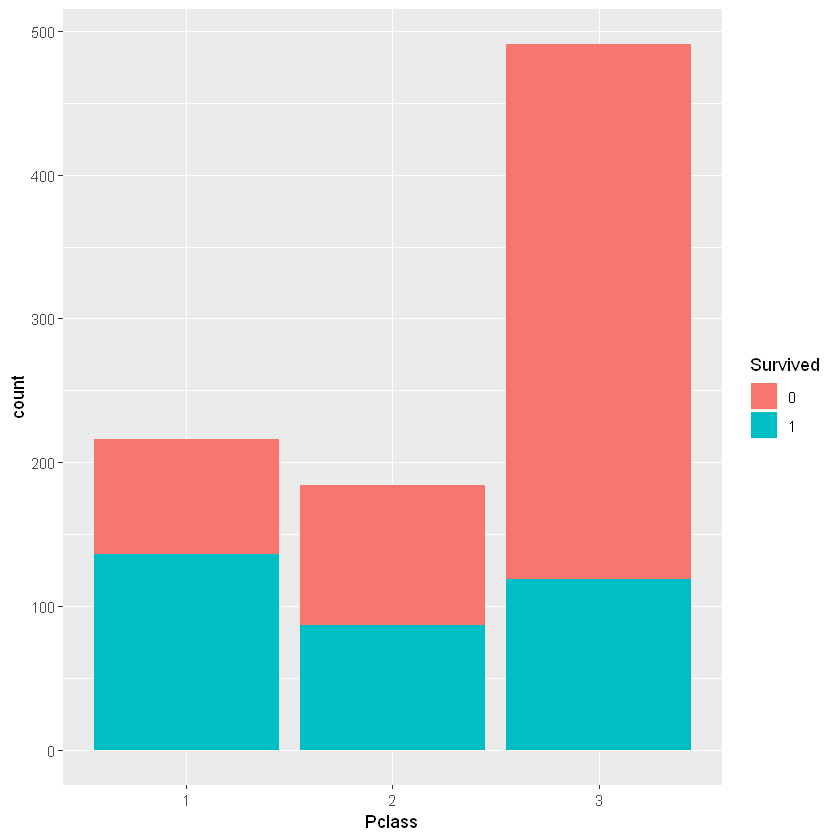

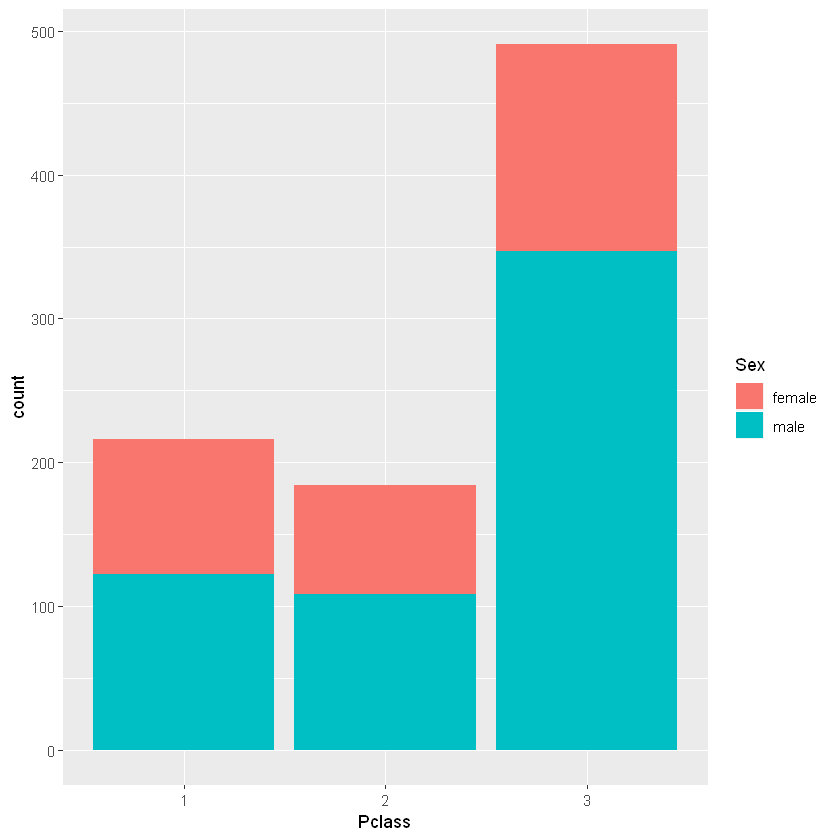

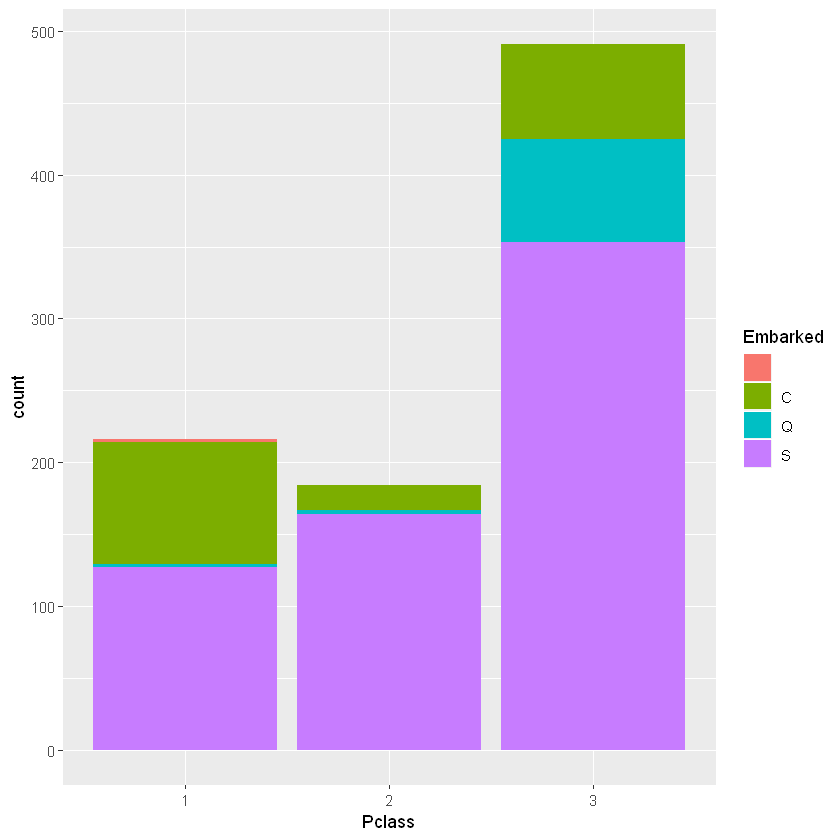

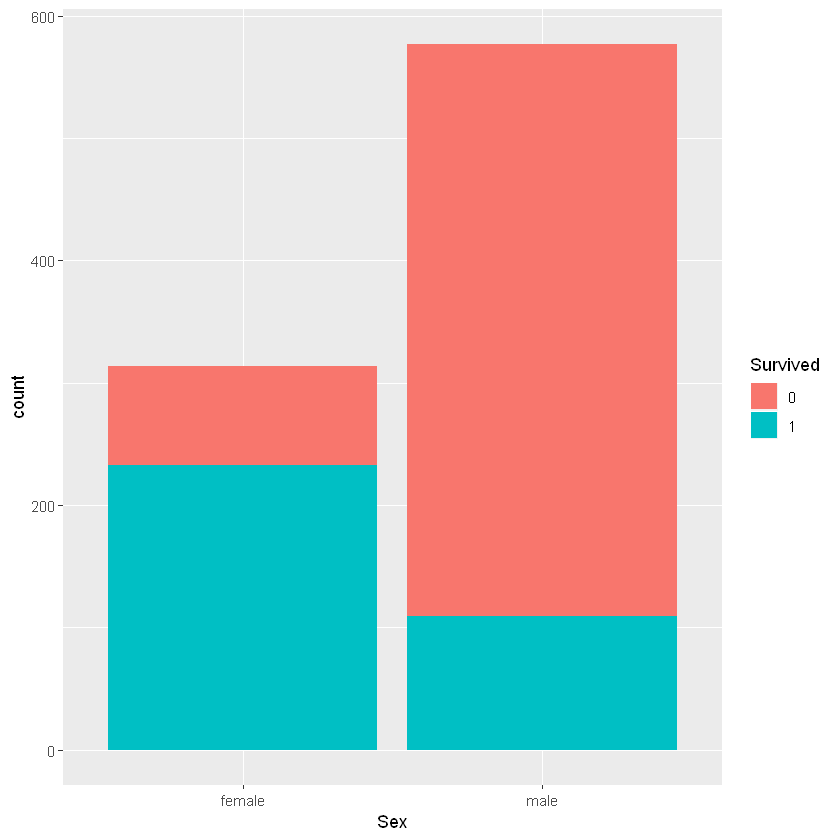

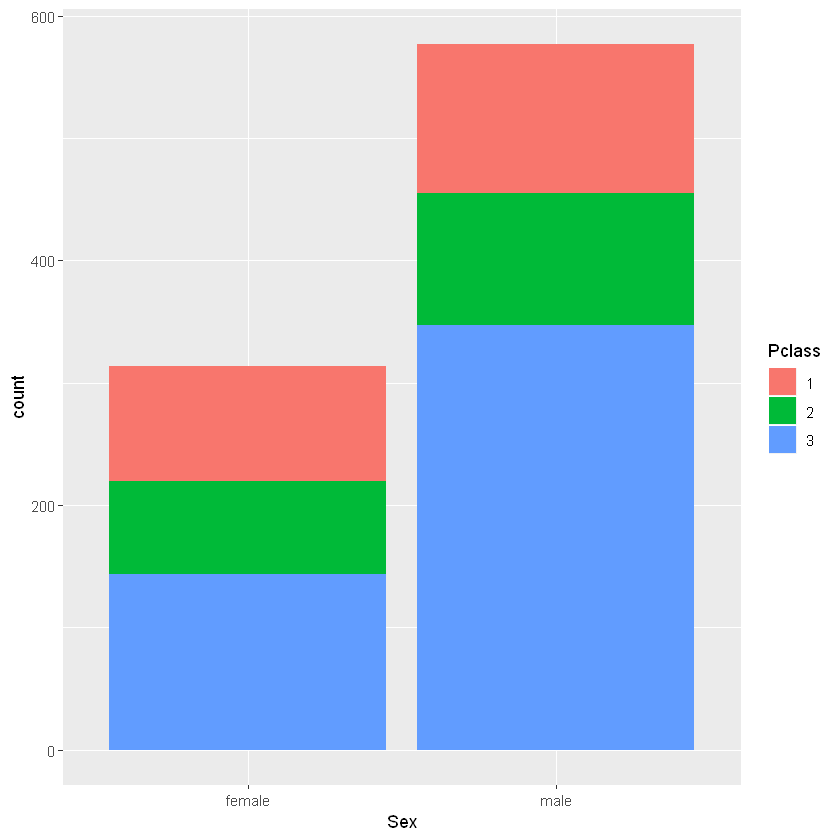

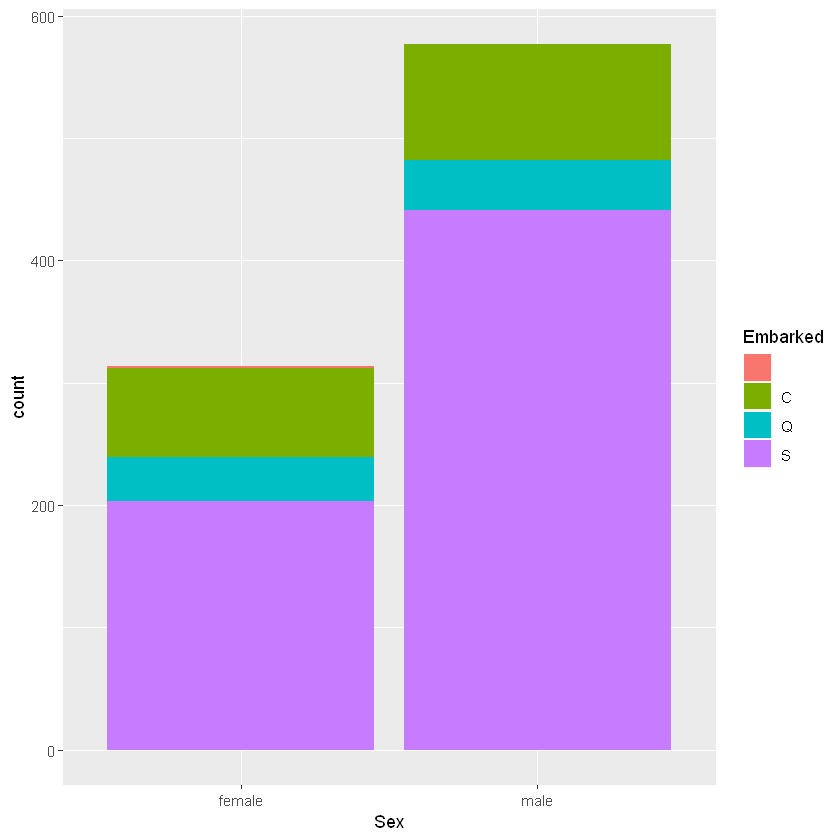

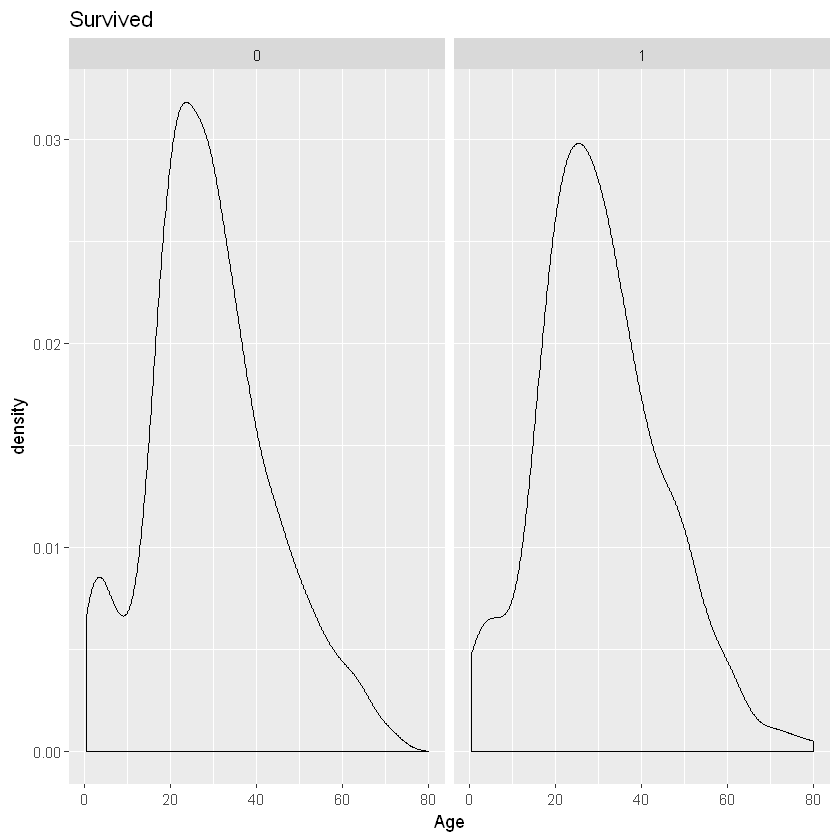

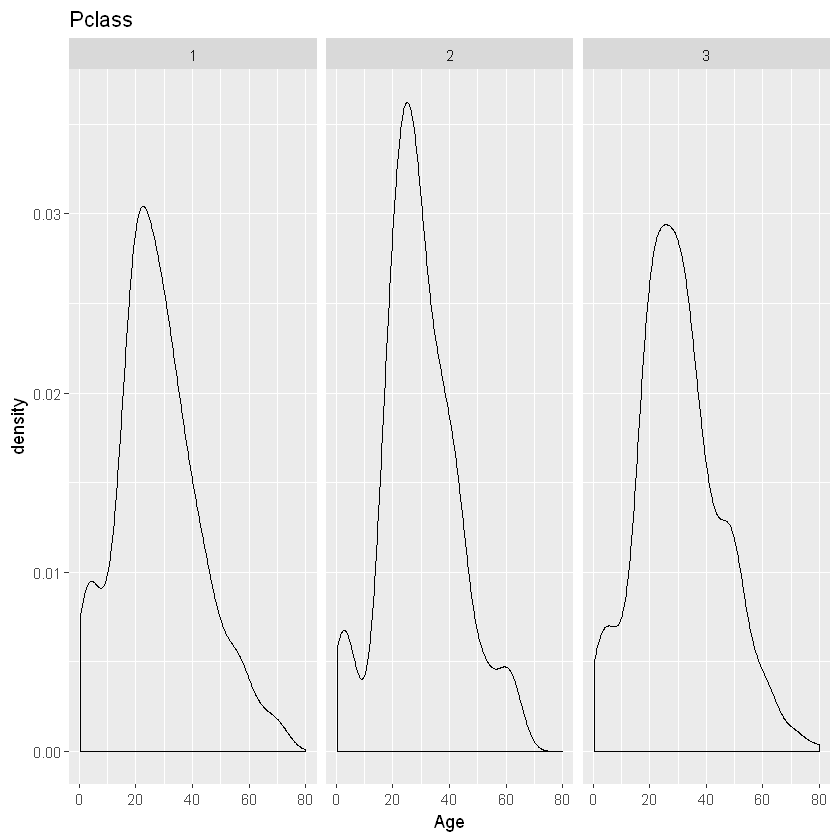

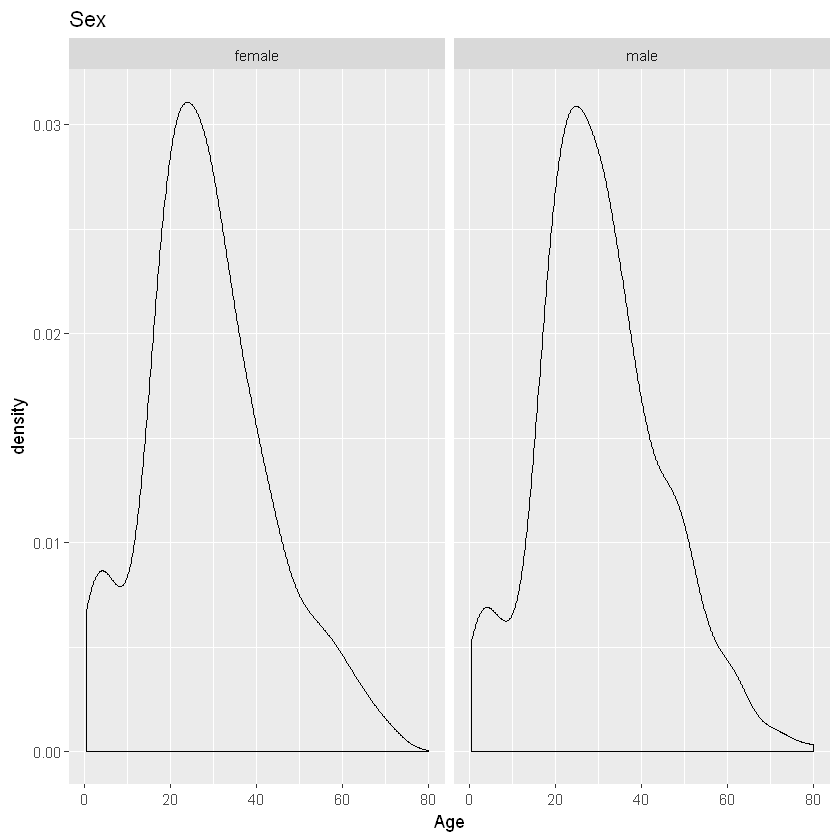

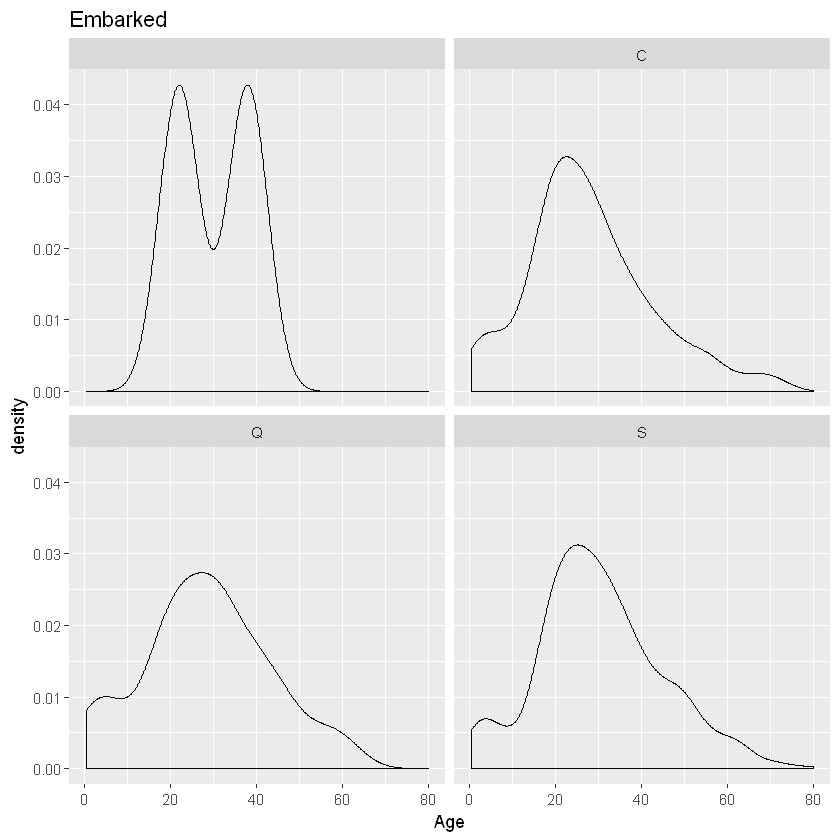

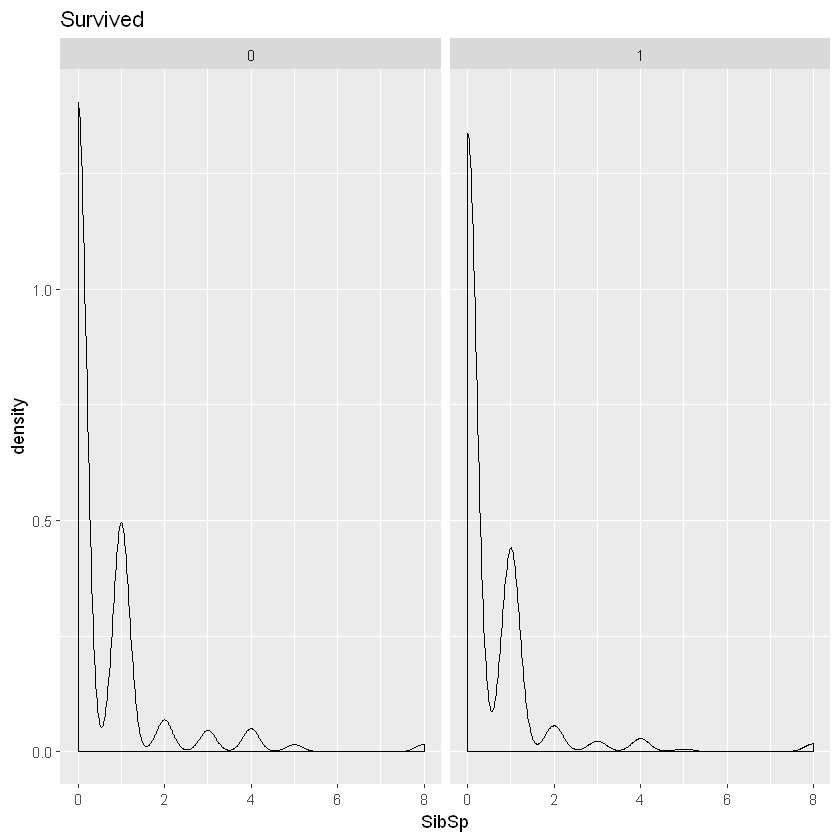

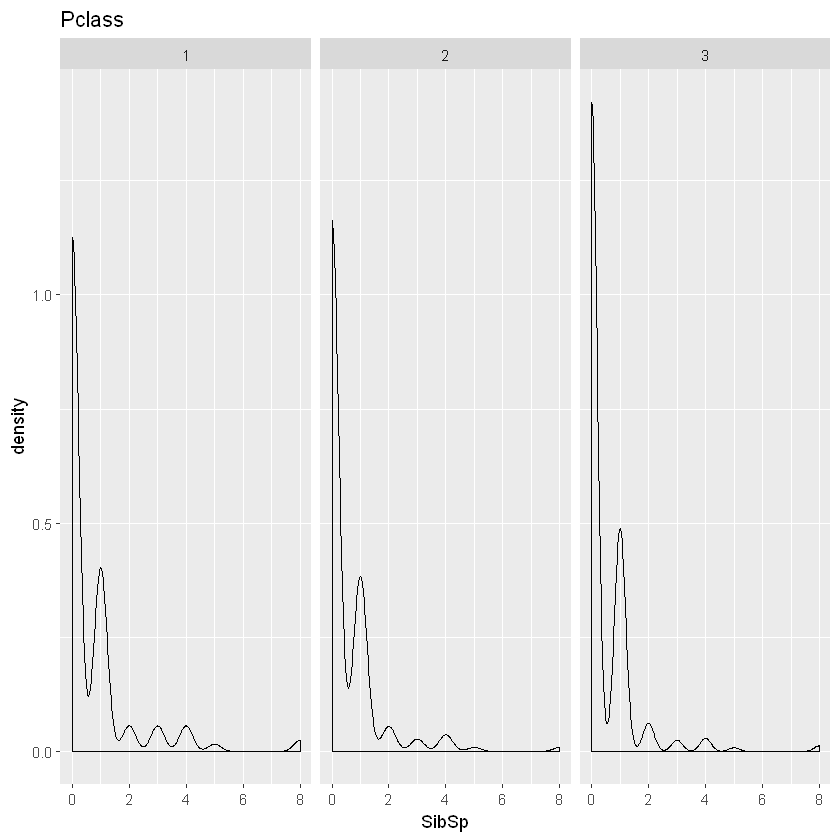

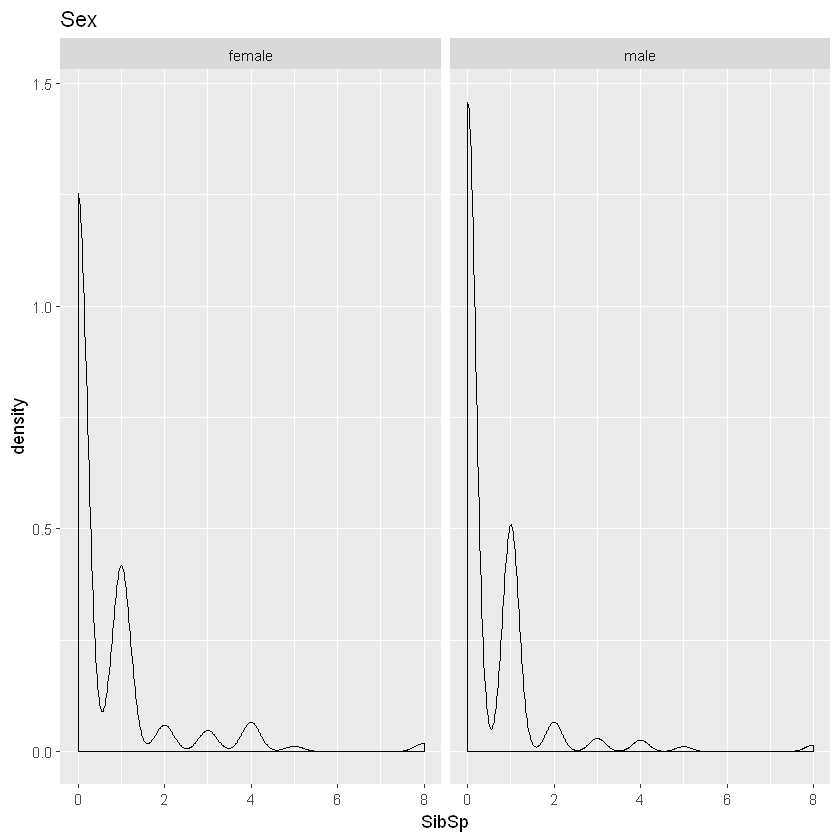

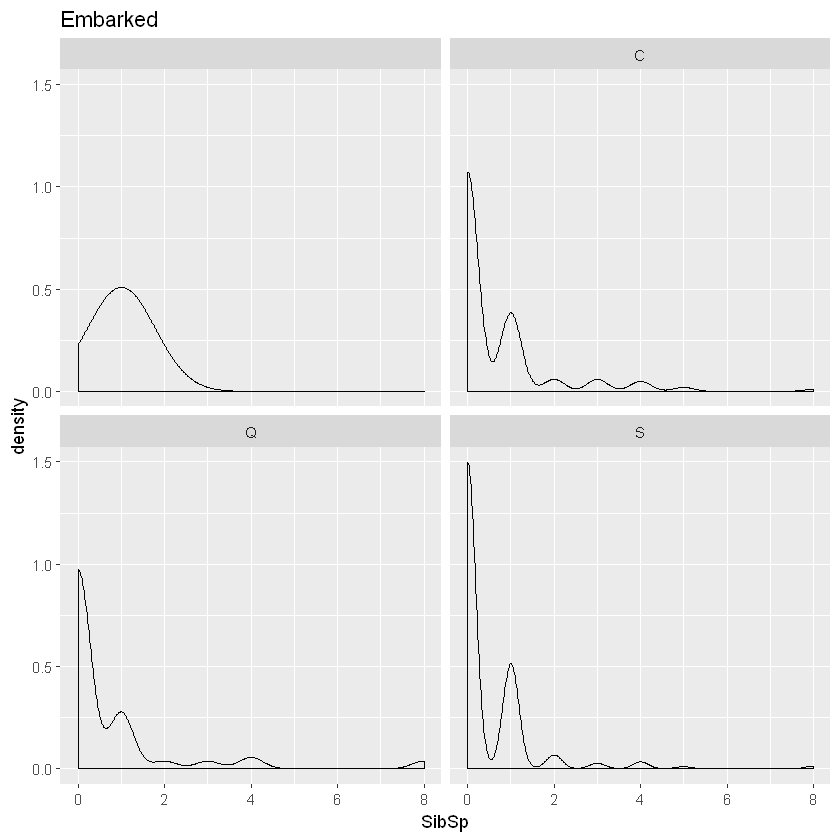

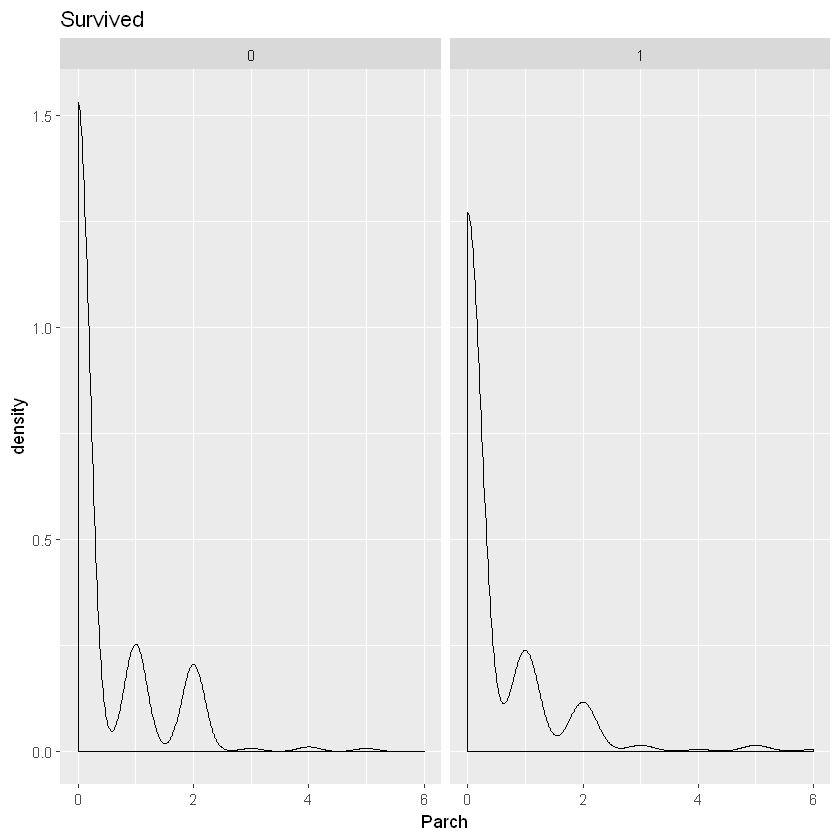

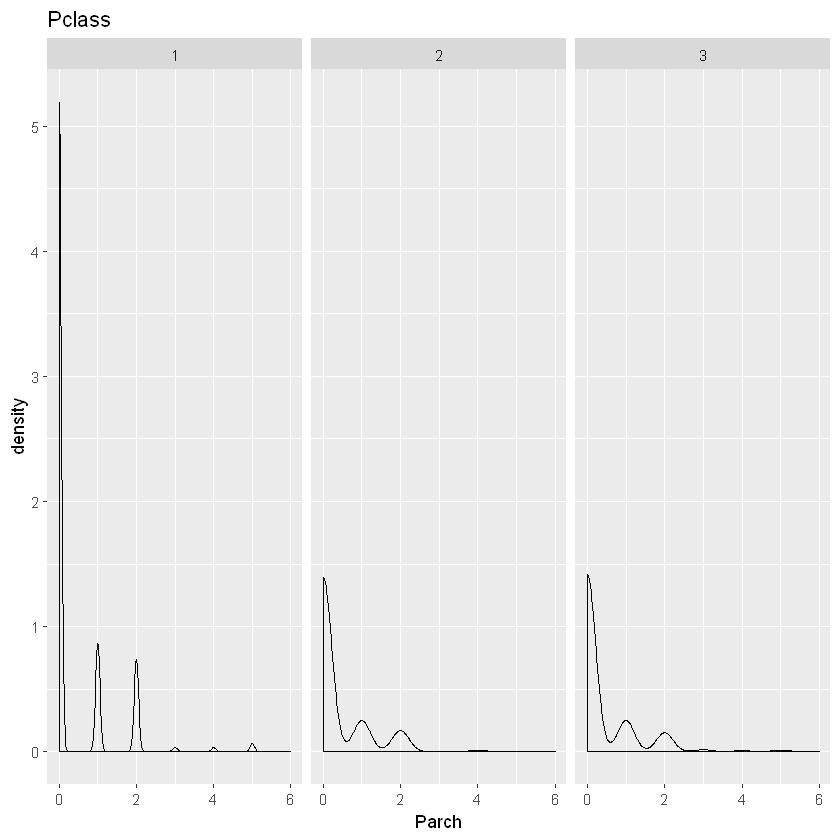

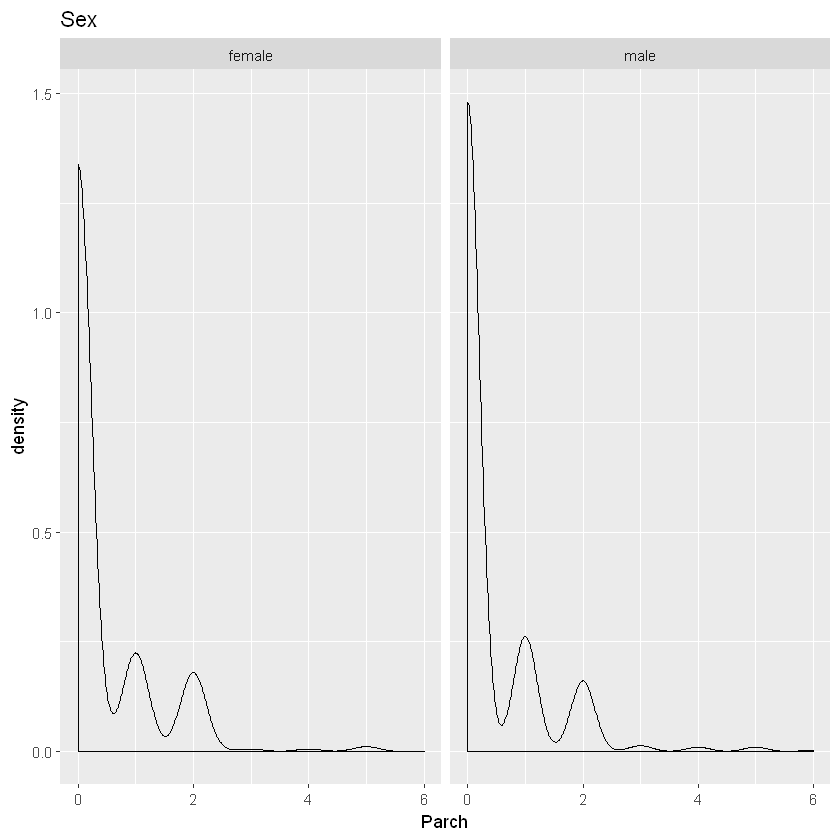

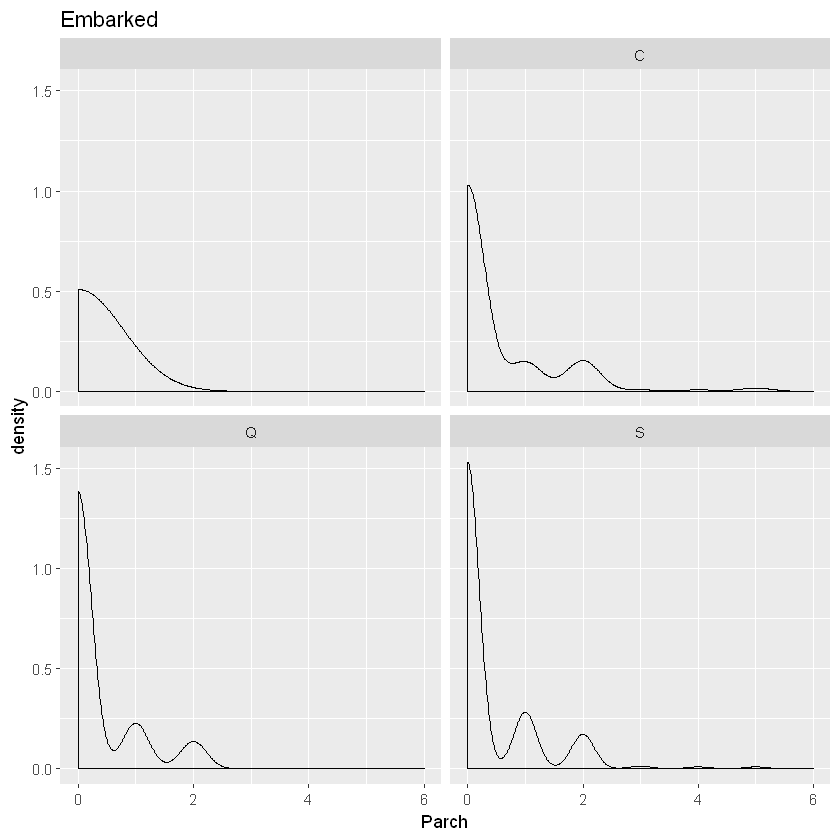

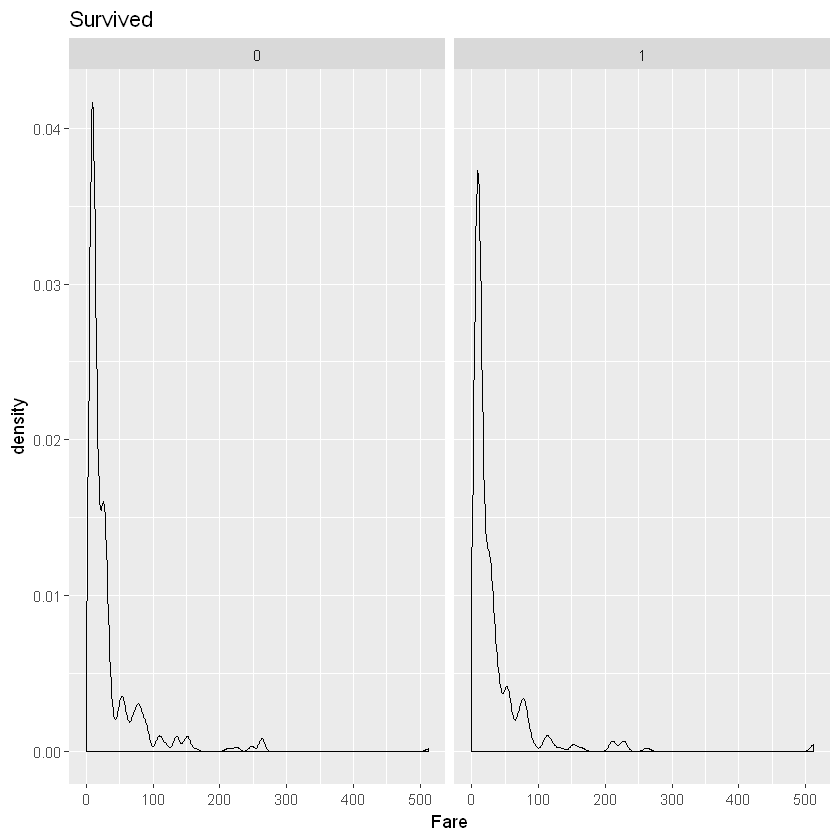

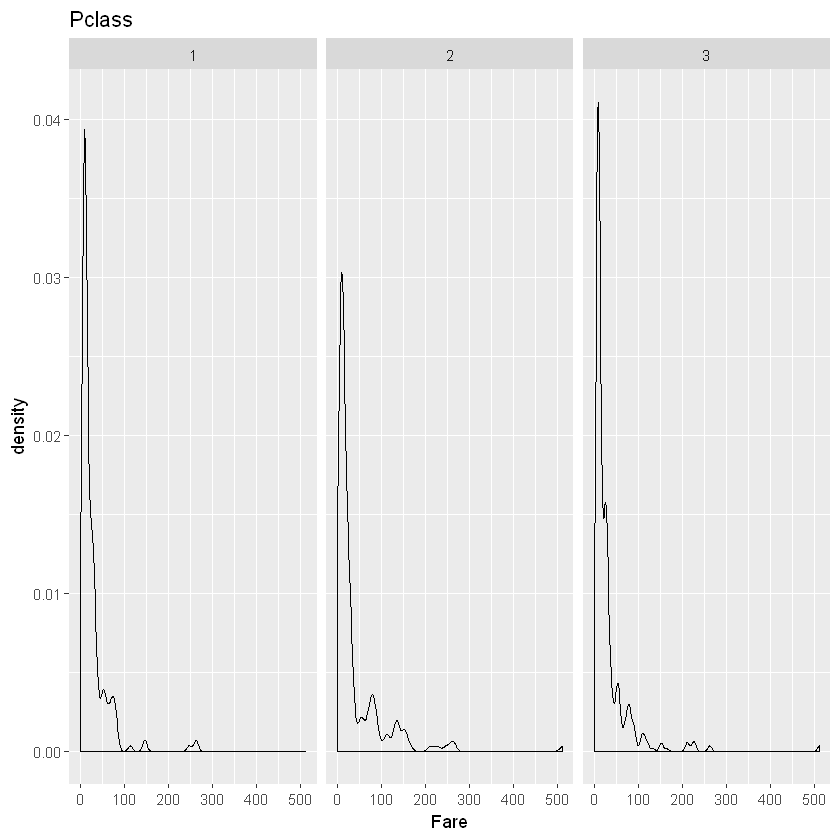

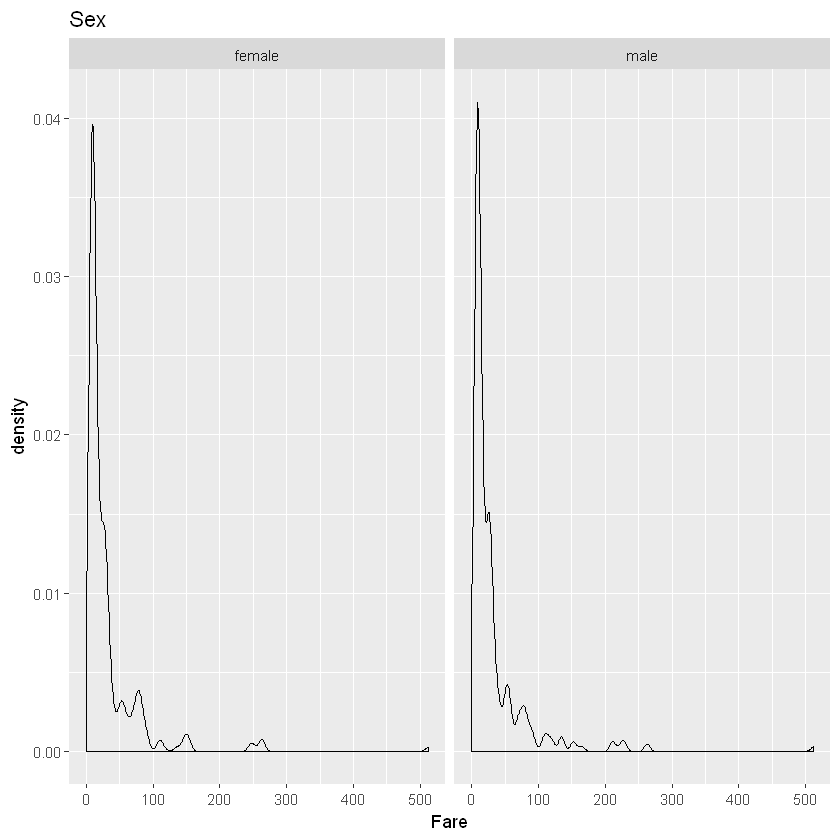

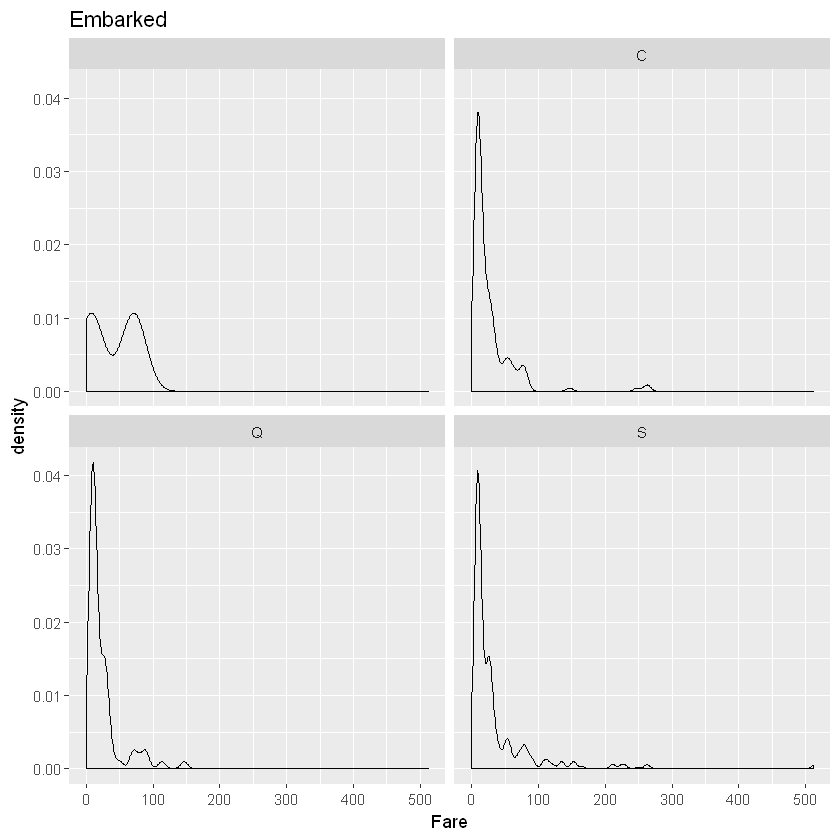

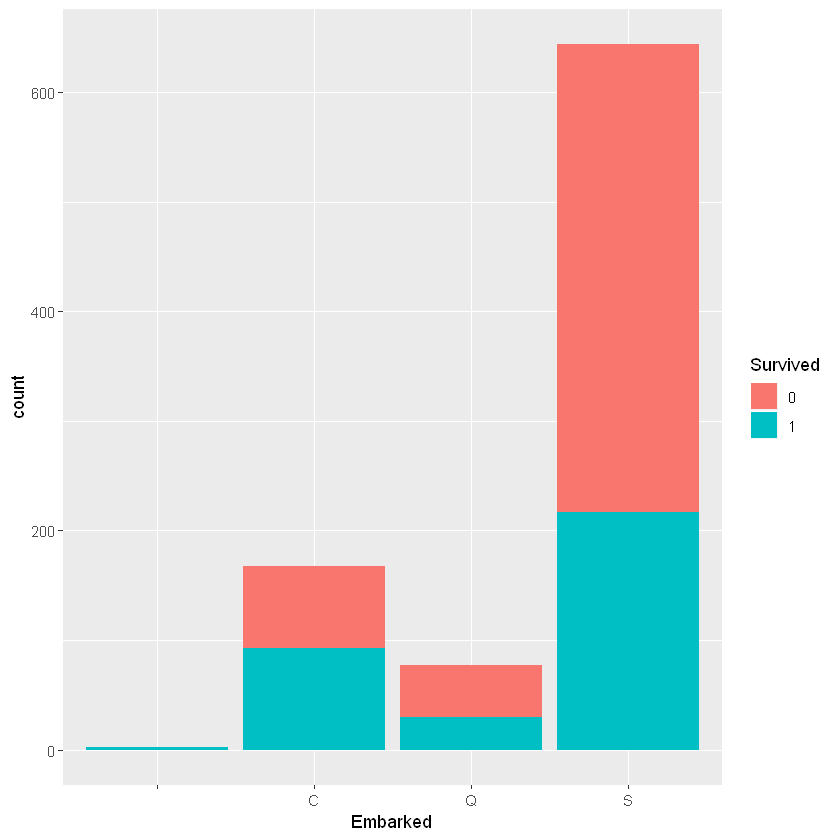

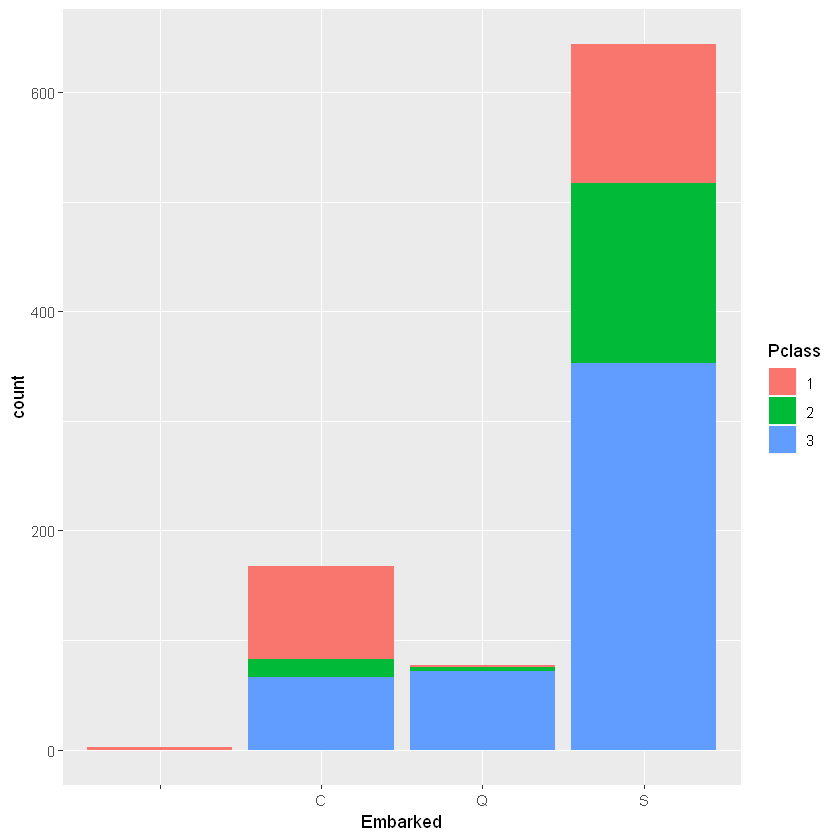

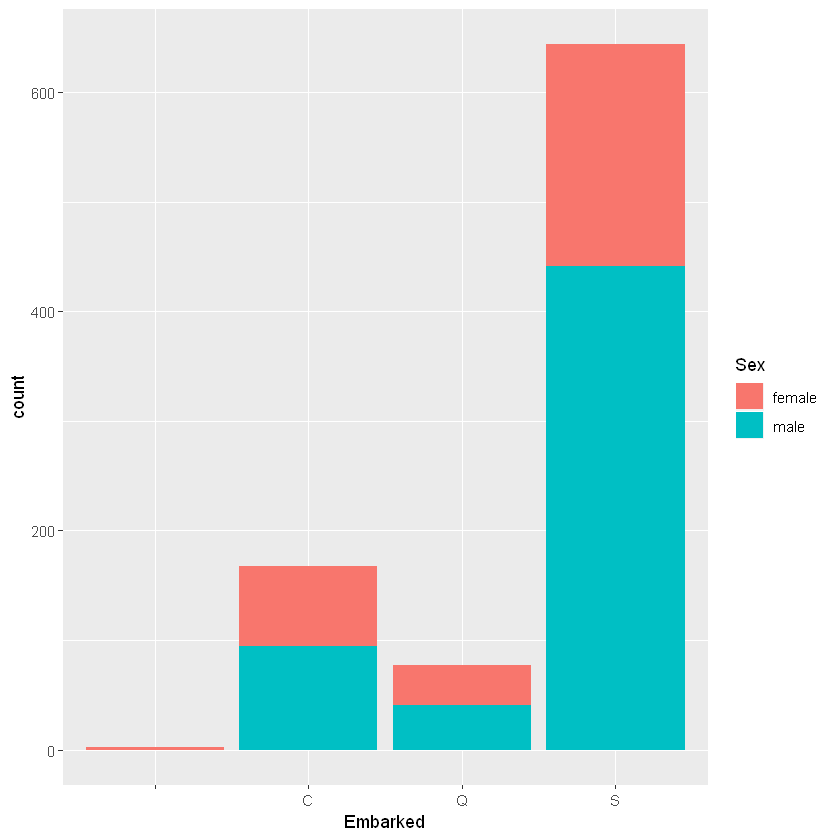

In [24]:
###13.	Write a function that does visualization of a dataset, i.e. the function should output a set of several graphs of the variables
GraphicalInfo = function(x){
  
for(i in 1:ncol(x)){
  if(is.numeric(x[,i])){
    for(j in 1:ncol(x)){
      if(is.factor(x[,j])){  
        print(ggplot() + geom_density(x, mapping = aes(x = x[,i]), na.rm = TRUE) +
                facet_wrap(x[,j]) + labs(x = names(x)[i], title = names(x)[j]))
      }
    }
  } else if(is.factor(x[,i])){
      for(j in 1:ncol(x)){
        if(is.factor(x[,j]) & i != j){
          print(ggplot() + geom_bar(x, mapping = aes(x = x[,i], fill = x[,j]), na.rm = TRUE) + labs(x = names(x)[i], fill = names(x)[j]))
        }
      }
    }
    
#if statements added to shrink number of results and target actually interesting ones  
}
}
GraphicalInfo(titanic)
